# Evaluating each RAG pipeline using langsmith

In [1]:
import os
from dotenv import load_dotenv, find_dotenv

# Load environment variables from the .env file using 'from dotenv import find_dotenv, load_dotenv'
load_dotenv(find_dotenv(filename='SURF-Project_Optimizing-PerunaBot/setup/.env'))

openai_api_key = os.environ['OPENAI_API_KEY']

In [2]:
import nest_asyncio
nest_asyncio.apply()

Importing the 4 different RAG pipelines we made for each evaluation.

In [3]:
from OG_PerunaBot_chain import Original_PerunaBot_eval_chain
from chain_0 import base_retriever_eval_chain_0
from chain_1 import parent_retriever_eval_chain_1
from chain_2 import ensemble_retriever_eval_chain_2

In [4]:
from langsmith.evaluation import evaluate, LangChainStringEvaluator

# Target task definition

# The name or UUID of the LangSmith dataset to evaluate on.

data = "SMU Schools QA"

# A string to prefix the experiment name with.
# If not provided, a random string will be generated.
experiment_prefix = "SMU Schools QA"

# List of evaluators to score the outputs of target task
evaluators = [
  LangChainStringEvaluator("cot_qa"),
  LangChainStringEvaluator("labeled_criteria", config={"criteria": "detail"}),
  LangChainStringEvaluator("labeled_criteria", config={"criteria": "coherence"}),
  LangChainStringEvaluator("labeled_criteria", config={"criteria": "relevance"}),
  LangChainStringEvaluator("labeled_criteria", config={"criteria": "helpfulness"})
]


In [5]:
def predict_OG_chain(inputs: dict):
    response = Original_PerunaBot_eval_chain.invoke({"question": inputs["question"]})
    return {"answer" : response["output"]}

def predict_chain_0(inputs: dict):
    response = base_retriever_eval_chain_0.invoke({"question": inputs["question"]})
    return {"answer" : response["output"]}

def predict_chain_1(inputs: dict):
    response = parent_retriever_eval_chain_1.invoke({"question": inputs["question"]})
    return {"answer" : response["output"]}

def predict_chain_2(inputs: dict):
    response = ensemble_retriever_eval_chain_2.invoke({"question": inputs["question"]})
    return {"answer" : response["output"]}

In [ ]:

# Evaluate the target task
OG_PerunaBot_langsmith_eval = evaluate(
  predict_OG_chain,
  data=data,
  evaluators=evaluators,
  experiment_prefix=experiment_prefix + " on OG PerunaBot chain",
)

View the evaluation results for experiment: 'SMU Schools QA on OG PerunaBot chain-a304c553' at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/7a23c577-228e-4b2b-a8af-c9e0a13c1625/compare?selectedSessions=ecf88071-640f-4256-974d-9fd4d1a97eac




0it [00:00, ?it/s]

Error running evaluator <DynamicRunEvaluator evaluate> on run 98231041-a269-4f41-a1d5-2968d0514a2e: RateLimitError("Error code: 429 - {'error': {'message': 'Rate limit reached for gpt-4 in organization org-Hkbsf8yAWp77cZYrVZcR2Dim on tokens per min (TPM): Limit 10000, Used 9956, Requested 455. Please try again in 2.466s. Visit https://platform.openai.com/account/rate-limits to learn more.', 'type': 'tokens', 'param': None, 'code': 'rate_limit_exceeded'}}")
Traceback (most recent call last):
  File "c:\Users\yawbt\OneDrive\Documents\GitHub\SURF-Project_Optimizing-PerunaBot\.venv\Lib\site-packages\langsmith\evaluation\_runner.py", line 1258, in _run_evaluators
    evaluator_response = evaluator.evaluate_run(
                         ^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\yawbt\OneDrive\Documents\GitHub\SURF-Project_Optimizing-PerunaBot\.venv\Lib\site-packages\langsmith\evaluation\evaluator.py", line 278, in evaluate_run
    result = self.func(
             ^^^^^^^^^^
  File "c:\Users\y

In [10]:
chain_0_langsmith_eval = evaluate(
    predict_chain_0,
    data=data,
    evaluators=evaluators,
    experiment_prefix=experiment_prefix + " on chain 0",
    )

View the evaluation results for experiment: 'SMU Schools QA on chain 0-84b421e8' at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/7a23c577-228e-4b2b-a8af-c9e0a13c1625/compare?selectedSessions=6e309932-01f3-4527-8494-e22d3aea26a3




0it [00:00, ?it/s]

Error running evaluator <DynamicRunEvaluator evaluate> on run fa9943e0-e122-434b-8408-9b13e89eb842: RateLimitError("Error code: 429 - {'error': {'message': 'Rate limit reached for gpt-4 in organization org-Hkbsf8yAWp77cZYrVZcR2Dim on tokens per min (TPM): Limit 10000, Used 9987, Requested 447. Please try again in 2.604s. Visit https://platform.openai.com/account/rate-limits to learn more.', 'type': 'tokens', 'param': None, 'code': 'rate_limit_exceeded'}}")
Traceback (most recent call last):
  File "c:\Users\yawbt\OneDrive\Documents\GitHub\SURF-Project_Optimizing-PerunaBot\.venv\Lib\site-packages\langsmith\evaluation\_runner.py", line 1258, in _run_evaluators
    evaluator_response = evaluator.evaluate_run(
                         ^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\yawbt\OneDrive\Documents\GitHub\SURF-Project_Optimizing-PerunaBot\.venv\Lib\site-packages\langsmith\evaluation\evaluator.py", line 278, in evaluate_run
    result = self.func(
             ^^^^^^^^^^
  File "c:\Users\y

In [11]:

chain_1_langsmith_eval = evaluate(
    predict_chain_1,
    data=data,
    evaluators=evaluators,
    experiment_prefix=experiment_prefix + " on chain 1",
    )


View the evaluation results for experiment: 'SMU Schools QA on chain 1-218c12d4' at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/7a23c577-228e-4b2b-a8af-c9e0a13c1625/compare?selectedSessions=f3f2b3db-eb84-40b3-89b5-15243b76b76c




0it [00:00, ?it/s]

Error running evaluator <DynamicRunEvaluator evaluate> on run 85141248-c6ff-43c9-a196-1e40471c7212: RateLimitError("Error code: 429 - {'error': {'message': 'Rate limit reached for gpt-4 in organization org-Hkbsf8yAWp77cZYrVZcR2Dim on tokens per min (TPM): Limit 10000, Used 9974, Requested 471. Please try again in 2.67s. Visit https://platform.openai.com/account/rate-limits to learn more.', 'type': 'tokens', 'param': None, 'code': 'rate_limit_exceeded'}}")
Traceback (most recent call last):
  File "c:\Users\yawbt\OneDrive\Documents\GitHub\SURF-Project_Optimizing-PerunaBot\.venv\Lib\site-packages\langsmith\evaluation\_runner.py", line 1258, in _run_evaluators
    evaluator_response = evaluator.evaluate_run(
                         ^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\yawbt\OneDrive\Documents\GitHub\SURF-Project_Optimizing-PerunaBot\.venv\Lib\site-packages\langsmith\evaluation\evaluator.py", line 278, in evaluate_run
    result = self.func(
             ^^^^^^^^^^
  File "c:\Users\ya

In [12]:

chain_2_langsmith_eval = evaluate(
    predict_chain_2,
    data=data,
    evaluators=evaluators,
    experiment_prefix=experiment_prefix + " on chain 2",
    )

View the evaluation results for experiment: 'SMU Schools QA on chain 2-bc545425' at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/7a23c577-228e-4b2b-a8af-c9e0a13c1625/compare?selectedSessions=741bccb0-8b19-42a9-a919-523e38be7eb7




0it [00:00, ?it/s]

Error running evaluator <DynamicRunEvaluator evaluate> on run 1efeb8bd-5d78-4f16-aaad-5a89628dbedd: RateLimitError("Error code: 429 - {'error': {'message': 'Rate limit reached for gpt-4 in organization org-Hkbsf8yAWp77cZYrVZcR2Dim on tokens per min (TPM): Limit 10000, Used 9973, Requested 458. Please try again in 2.586s. Visit https://platform.openai.com/account/rate-limits to learn more.', 'type': 'tokens', 'param': None, 'code': 'rate_limit_exceeded'}}")
Traceback (most recent call last):
  File "c:\Users\yawbt\OneDrive\Documents\GitHub\SURF-Project_Optimizing-PerunaBot\.venv\Lib\site-packages\langsmith\evaluation\_runner.py", line 1258, in _run_evaluators
    evaluator_response = evaluator.evaluate_run(
                         ^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\yawbt\OneDrive\Documents\GitHub\SURF-Project_Optimizing-PerunaBot\.venv\Lib\site-packages\langsmith\evaluation\evaluator.py", line 278, in evaluate_run
    result = self.func(
             ^^^^^^^^^^
  File "c:\Users\y

In [6]:
from ragas.integrations.langchain import EvaluatorChain as RagasEvaluatorChain
from ragas.metrics import (
    faithfulness,
    answer_relevancy,
    context_utilization
)

# create evaluation chains
faithfulness_chain = RagasEvaluatorChain(metric=faithfulness)
answer_rel_chain = RagasEvaluatorChain(metric=answer_relevancy)
context_util_chain = RagasEvaluatorChain(metric=context_utilization)

ragas_evaluators = [
    faithfulness_chain,
    answer_rel_chain,
    context_util_chain
]

dataset_2 = "RAGAS Testset QA"

In [7]:
def predict_OG_chain_with_context(input: dict):
    response = Original_PerunaBot_eval_chain.invoke({"question": input["question"]})
    return {"answer": response["output"], "contexts": response["context"]}

def predict_chain_0_with_context(input: dict):
    response = base_retriever_eval_chain_0.invoke({"question": input["question"]})
    return {"answer": response["output"], "contexts": response["context"]}

def predict_chain_1_with_context(input: dict):
    response = parent_retriever_eval_chain_1.invoke({"question": input["question"]})
    return {"answer": response["output"], "contexts": response["context"]}

def predict_chain_2_with_context(input: dict):
    response = ensemble_retriever_eval_chain_2.invoke({"question": input["question"]})
    return {"answer": response["output"], "contexts": response["context"]}

In [ ]:
# Evaluate the target task
OG_PerunaBot_ragas_langsmith_eval = evaluate(
  predict_OG_chain_with_context,
  data=dataset_2,
  evaluators=ragas_evaluators,
  experiment_prefix="OG PerunaBot chain",
)


In [8]:

chain_0_ragas_langsmith_eval = evaluate(
    predict_chain_0_with_context,
    data=dataset_2,
    evaluators=ragas_evaluators,
    experiment_prefix="chain 0",
    )


View the evaluation results for experiment: 'chain 0-8d0b3f5a' at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/3643247a-7c6c-40d9-927e-ae50f5055df5/compare?selectedSessions=b7c5970b-a793-4d6a-968f-44537eba5bd2




0it [00:00, ?it/s]

Error running target function: Error code: 429 - {'error': {'message': 'Rate limit reached for gpt-4o in organization org-Hkbsf8yAWp77cZYrVZcR2Dim on tokens per min (TPM): Limit 30000, Used 28136, Requested 2975. Please try again in 2.222s. Visit https://platform.openai.com/account/rate-limits to learn more.', 'type': 'tokens', 'param': None, 'code': 'rate_limit_exceeded'}}
Error running evaluator EvaluatorChain(metric=Faithfulness(llm=LangchainLLMWrapper(run_config=RunConfig(timeout=60, max_retries=10, max_wait=60, max_workers=16, thread_timeout=80.0, exception_types=<class 'openai.RateLimitError'>, log_tenacity=False)), name='faithfulness', evaluation_mode=<EvaluationMode.qac: 1>, nli_statements_message=Prompt(name='nli_statements', instruction='Your task is to judge the faithfulness of a series of statements based on a given context. For each statement you must return verdict as 1 if the statement can be directly inferred based on the context or 0 if the statement can not be directl

In [8]:

chain_1_ragas_langsmith_eval = evaluate(
    predict_chain_1_with_context,
    data=dataset_2,
    evaluators=ragas_evaluators,
    experiment_prefix="chain 1",
    )


View the evaluation results for experiment: 'chain 1-248e040c' at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/3643247a-7c6c-40d9-927e-ae50f5055df5/compare?selectedSessions=d43cb0fe-b6b9-4599-9f7b-d644e19674b1




0it [00:00, ?it/s]

Error running target function: Error code: 429 - {'error': {'message': 'Rate limit reached for gpt-4o in organization org-Hkbsf8yAWp77cZYrVZcR2Dim on tokens per min (TPM): Limit 30000, Used 27254, Requested 3209. Please try again in 926ms. Visit https://platform.openai.com/account/rate-limits to learn more.', 'type': 'tokens', 'param': None, 'code': 'rate_limit_exceeded'}}
Error running target function: Error code: 429 - {'error': {'message': 'Rate limit reached for gpt-4o in organization org-Hkbsf8yAWp77cZYrVZcR2Dim on tokens per min (TPM): Limit 30000, Used 29767, Requested 3257. Please try again in 6.048s. Visit https://platform.openai.com/account/rate-limits to learn more.', 'type': 'tokens', 'param': None, 'code': 'rate_limit_exceeded'}}
Error running target function: Error code: 429 - {'error': {'message': 'Rate limit reached for gpt-4o in organization org-Hkbsf8yAWp77cZYrVZcR2Dim on tokens per min (TPM): Limit 30000, Used 27944, Requested 3315. Please try again in 2.518s. Visit 

In [8]:

chain_2_ragas_langsmith_eval = evaluate(
    predict_chain_2_with_context,
    data=dataset_2,
    evaluators=ragas_evaluators,
    experiment_prefix="chain 2",
    )

View the evaluation results for experiment: 'chain 2-c52d3c61' at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/3643247a-7c6c-40d9-927e-ae50f5055df5/compare?selectedSessions=fbfa5c22-9704-4cbe-b672-dc68e93f4551




0it [00:00, ?it/s]

Error running target function: Error code: 429 - {'error': {'message': 'Rate limit reached for gpt-4o in organization org-Hkbsf8yAWp77cZYrVZcR2Dim on tokens per min (TPM): Limit 30000, Used 29163, Requested 3750. Please try again in 5.826s. Visit https://platform.openai.com/account/rate-limits to learn more.', 'type': 'tokens', 'param': None, 'code': 'rate_limit_exceeded'}}
Error running target function: Error code: 429 - {'error': {'message': 'Rate limit reached for gpt-4o in organization org-Hkbsf8yAWp77cZYrVZcR2Dim on tokens per min (TPM): Limit 30000, Used 29051, Requested 3899. Please try again in 5.9s. Visit https://platform.openai.com/account/rate-limits to learn more.', 'type': 'tokens', 'param': None, 'code': 'rate_limit_exceeded'}}
Error running target function: Error code: 429 - {'error': {'message': 'Rate limit reached for gpt-4o in organization org-Hkbsf8yAWp77cZYrVZcR2Dim on tokens per min (TPM): Limit 30000, Used 27343, Requested 2703. Please try again in 92ms. Visit htt

In [9]:
from langsmith.evaluation import evaluate, LangChainStringEvaluator

# Target task definition

# The name or UUID of the LangSmith dataset to evaluate on.
# Alternatively, you can pass an iterator of examples
dataset_3 = "SMU Schools Questions"


# List of evaluators to score the outputs of target task
langsmith_evaluators = [
  LangChainStringEvaluator("labeled_criteria", config={"criteria": "detail"}),
  LangChainStringEvaluator("labeled_criteria", config={"criteria": "coherence"}),
  LangChainStringEvaluator("labeled_criteria", config={"criteria": "relevance"}),
  LangChainStringEvaluator("labeled_criteria", config={"criteria": "helpfulness"})
]

In [ ]:
def predict_OG_chain(inputs: dict):
    response = Original_PerunaBot_eval_chain.invoke({"question": inputs["question"]})
    return {"answer" : response["output"]}

def predict_chain_0(inputs: dict):
    response = base_retriever_eval_chain_0.invoke({"question": inputs["question"]})
    return {"answer" : response["output"]}

def predict_chain_1(inputs: dict):
    response = parent_retriever_eval_chain_1.invoke({"question": inputs["question"]})
    return {"answer" : response["output"]}

def predict_chain_2(inputs: dict):
    response = ensemble_retriever_eval_chain_2.invoke({"question": inputs["question"]})
    return {"answer" : response["output"]}

In [10]:
OG_PerunaBot_langsmith_eval_2 = evaluate(
    predict_OG_chain,
    data=dataset_3,
    evaluators=langsmith_evaluators,
    experiment_prefix="OG PerunaBot chain"
)

View the evaluation results for experiment: 'OG PerunaBot chain-39986212' at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/5d401ffc-aab6-461d-9092-0648c24d8a80/compare?selectedSessions=77674d36-5c7f-40ab-aac5-9ade509cd489




0it [00:00, ?it/s]

Error running evaluator <DynamicRunEvaluator evaluate> on run e5b01709-c139-4df4-be2f-b067cbf3c941: ValueError('LabeledCriteriaEvalChain requires a reference string.')
Traceback (most recent call last):
  File "c:\Users\yawbt\OneDrive\Documents\GitHub\SURF-Project_Optimizing-PerunaBot\.venv\Lib\site-packages\langsmith\evaluation\_runner.py", line 1258, in _run_evaluators
    evaluator_response = evaluator.evaluate_run(
                         ^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\yawbt\OneDrive\Documents\GitHub\SURF-Project_Optimizing-PerunaBot\.venv\Lib\site-packages\langsmith\evaluation\evaluator.py", line 278, in evaluate_run
    result = self.func(
             ^^^^^^^^^^
  File "c:\Users\yawbt\OneDrive\Documents\GitHub\SURF-Project_Optimizing-PerunaBot\.venv\Lib\site-packages\langsmith\run_helpers.py", line 582, in wrapper
    raise e
  File "c:\Users\yawbt\OneDrive\Documents\GitHub\SURF-Project_Optimizing-PerunaBot\.venv\Lib\site-packages\langsmith\run_helpers.py", line 579, 

In [11]:

chain_0_langsmith_eval_2 = evaluate(
    predict_chain_0,
    data=dataset_3,
    evaluators=langsmith_evaluators,
    experiment_prefix="chain 0"
)


View the evaluation results for experiment: 'chain 0-1f26194d' at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/5d401ffc-aab6-461d-9092-0648c24d8a80/compare?selectedSessions=40dba849-ef43-4fc2-85f6-2ac2fb331aeb




0it [00:00, ?it/s]

Error running evaluator <DynamicRunEvaluator evaluate> on run 67c3d8ce-b579-4d1e-8e53-ccb99043cb75: ValueError('LabeledCriteriaEvalChain requires a reference string.')
Traceback (most recent call last):
  File "c:\Users\yawbt\OneDrive\Documents\GitHub\SURF-Project_Optimizing-PerunaBot\.venv\Lib\site-packages\langsmith\evaluation\_runner.py", line 1258, in _run_evaluators
    evaluator_response = evaluator.evaluate_run(
                         ^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\yawbt\OneDrive\Documents\GitHub\SURF-Project_Optimizing-PerunaBot\.venv\Lib\site-packages\langsmith\evaluation\evaluator.py", line 278, in evaluate_run
    result = self.func(
             ^^^^^^^^^^
  File "c:\Users\yawbt\OneDrive\Documents\GitHub\SURF-Project_Optimizing-PerunaBot\.venv\Lib\site-packages\langsmith\run_helpers.py", line 582, in wrapper
    raise e
  File "c:\Users\yawbt\OneDrive\Documents\GitHub\SURF-Project_Optimizing-PerunaBot\.venv\Lib\site-packages\langsmith\run_helpers.py", line 579, 

In [12]:

chain_1_langsmith_eval_2 = evaluate(
    predict_chain_1,
    data=dataset_3,
    evaluators=langsmith_evaluators,
    experiment_prefix="chain 1"
)


View the evaluation results for experiment: 'chain 1-30610d12' at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/5d401ffc-aab6-461d-9092-0648c24d8a80/compare?selectedSessions=0f8bfae4-12be-4d93-becd-9d480a978689




0it [00:00, ?it/s]

Error running evaluator <DynamicRunEvaluator evaluate> on run 86e982a7-a2c4-40cb-b19d-6ee6f2aff587: ValueError('LabeledCriteriaEvalChain requires a reference string.')
Traceback (most recent call last):
  File "c:\Users\yawbt\OneDrive\Documents\GitHub\SURF-Project_Optimizing-PerunaBot\.venv\Lib\site-packages\langsmith\evaluation\_runner.py", line 1258, in _run_evaluators
    evaluator_response = evaluator.evaluate_run(
                         ^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\yawbt\OneDrive\Documents\GitHub\SURF-Project_Optimizing-PerunaBot\.venv\Lib\site-packages\langsmith\evaluation\evaluator.py", line 278, in evaluate_run
    result = self.func(
             ^^^^^^^^^^
  File "c:\Users\yawbt\OneDrive\Documents\GitHub\SURF-Project_Optimizing-PerunaBot\.venv\Lib\site-packages\langsmith\run_helpers.py", line 582, in wrapper
    raise e
  File "c:\Users\yawbt\OneDrive\Documents\GitHub\SURF-Project_Optimizing-PerunaBot\.venv\Lib\site-packages\langsmith\run_helpers.py", line 579, 

In [13]:

chain_2_langsmith_eval_2 = evaluate(
    predict_chain_2,
    data=dataset_3,
    evaluators=langsmith_evaluators,
    experiment_prefix="chain 2"
)

View the evaluation results for experiment: 'chain 2-83a99ce8' at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/5d401ffc-aab6-461d-9092-0648c24d8a80/compare?selectedSessions=0d993ac0-9056-4302-828d-f57baa5f933d




0it [00:00, ?it/s]

Error running evaluator <DynamicRunEvaluator evaluate> on run 73769364-8264-4e01-9c6e-391062925a4b: ValueError('LabeledCriteriaEvalChain requires a reference string.')
Traceback (most recent call last):
  File "c:\Users\yawbt\OneDrive\Documents\GitHub\SURF-Project_Optimizing-PerunaBot\.venv\Lib\site-packages\langsmith\evaluation\_runner.py", line 1258, in _run_evaluators
    evaluator_response = evaluator.evaluate_run(
                         ^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\yawbt\OneDrive\Documents\GitHub\SURF-Project_Optimizing-PerunaBot\.venv\Lib\site-packages\langsmith\evaluation\evaluator.py", line 278, in evaluate_run
    result = self.func(
             ^^^^^^^^^^
  File "c:\Users\yawbt\OneDrive\Documents\GitHub\SURF-Project_Optimizing-PerunaBot\.venv\Lib\site-packages\langsmith\run_helpers.py", line 582, in wrapper
    raise e
  File "c:\Users\yawbt\OneDrive\Documents\GitHub\SURF-Project_Optimizing-PerunaBot\.venv\Lib\site-packages\langsmith\run_helpers.py", line 579, 

## Pairwise evaluations

In [35]:
from langsmith.evaluation import evaluate_comparative
from langchain import hub
from langchain_openai import ChatOpenAI
from langsmith.schemas import Run, Example

prompts = {
    "prompt" : hub.pull("langchain-ai/pairwise-evaluation-2"),
    "rag prompt" : hub.pull("langchain-ai/pairwise-evaluation-rag"),
    "academic advisor prompt" : hub.pull("perunabot-pairwise-evaluation")
}


Using Normal Prompt

In [36]:

def evaluate_pairwise_with_prompt(runs: list[Run], example: Example):
    scores = {}
    
    # Create the model to run your evaluator
    model = ChatOpenAI(model="gpt-4o")
    
    runnable = prompts["prompt"] | model
    response = runnable.invoke({
        "question": example.inputs["question"],
        "answer_a": runs[0].outputs["answer"] if runs[0].outputs is not None else "N/A",
        "answer_b": runs[1].outputs["answer"] if runs[1].outputs is not None else "N/A",
    })
    score = response["Preference"]
    if score == 1:
        scores[runs[0].id] = 1
        scores[runs[1].id] = 0
    elif score == 2:
        scores[runs[0].id] = 0
        scores[runs[1].id] = 1
    else:
        scores[runs[0].id] = 0
        scores[runs[1].id] = 0
    return {"key": "ranked_preference", "scores": scores}


In [ ]:
# OG PerunaBot vs Chain 0
pairwise_eval_1 = evaluate_comparative(
    ["OG PerunaBot chain-39986212", "chain 0-1f26194d"],
    evaluators=[evaluate_pairwise_with_prompt],
    experiment_prefix="OG PerunaBot vs Chain 0",
    randomize_order=True,
    metadata={"run name": "OG PerunaBot vs Chain 0",
              "prompt" : "langchain-ai/pairwise-evaluation-2"}
)

# OG PerunaBot vs Chain 1
pairwise_eval_2 = evaluate_comparative(
    ["OG PerunaBot chain-39986212", "chain 1-30610d12"],
    evaluators=[evaluate_pairwise_with_prompt],
    experiment_prefix="OG PerunaBot vs Chain 1",
    randomize_order=True,
    metadata={"run name": "OG PerunaBot vs Chain 1",
             "prompt" : "langchain-ai/pairwise-evaluation-2"}
)

# OG PerunaBot vs Chain 2
pairwise_eval_3 = evaluate_comparative(
    ["OG PerunaBot chain-39986212", "chain 2-83a99ce8"],
    evaluators=[evaluate_pairwise_with_prompt],
    experiment_prefix="OG PerunaBot vs Chain 2",
    randomize_order=True,
    metadata={"run name": "OG PerunaBot vs Chain 2",
              "prompt" : "langchain-ai/pairwise-evaluation-2"}
)

# Chain 0 vs Chain 1
pairwise_eval_4 = evaluate_comparative(
    ["chain 0-1f26194d", "chain 1-30610d12"],
    evaluators=[evaluate_pairwise_with_prompt],
    experiment_prefix="Chain 0 vs Chain 1",
    randomize_order=True,
    metadata={"run name": "Chain 0 vs Chain 1",
             "prompt" : "langchain-ai/pairwise-evaluation-2"}
)

# Chain 0 vs Chain 2
pairwise_eval_5 = evaluate_comparative(
    ["chain 0-1f26194d", "chain 2-83a99ce8"],
    evaluators=[evaluate_pairwise_with_prompt],
    experiment_prefix="Chain 0 vs Chain 2",
    randomize_order=True,
    metadata={"run name": "Chain 0 vs Chain 2",
              "prompt" : "langchain-ai/pairwise-evaluation-2"}
)

# Chain 1 vs Chain 2
pairwise_eval_6 = evaluate_comparative(
    ["chain 1-30610d12", "chain 2-83a99ce8"],
    evaluators=[evaluate_pairwise_with_prompt],
    experiment_prefix="Chain 1 vs Chain 2",
    randomize_order=True,
    metadata={"run name": "Chain 1 vs Chain 2",
              "prompt" : "langchain-ai/pairwise-evaluation-2"}
)

### Results

![Pairwise Evaluation Results](../Data/Evaluation%20Results/pairwise%20evaluation%20v1%207-30.png)

Using RAG Prompt

In [37]:

def evaluate_pairwise_with_rag_prompt(runs: list[Run], example: Example):
    scores = {}
    
    # Create the model to run your evaluator
    model = ChatOpenAI(model="gpt-4o")
    
    runnable = prompts["rag prompt"] | model
    response = runnable.invoke({
        "question": example.inputs["question"],
        "answer_a": runs[0].outputs["answer"] if runs[0].outputs is not None else "N/A",
        "answer_b": runs[1].outputs["answer"] if runs[1].outputs is not None else "N/A",
    })
    score = response["Preference"]
    if score == 1:
        scores[runs[0].id] = 1
        scores[runs[1].id] = 0
    elif score == 2:
        scores[runs[0].id] = 0
        scores[runs[1].id] = 1
    else:
        scores[runs[0].id] = 0
        scores[runs[1].id] = 0
    return {"key": "ranked_preference", "scores": scores}


In [ ]:
# OG PerunaBot vs Chain 0
pairwise_eval_1 = evaluate_comparative(
    ["OG PerunaBot chain-39986212", "chain 0-1f26194d"],
    evaluators=[evaluate_pairwise_with_rag_prompt],
    experiment_prefix="OG PerunaBot vs Chain 0",
    randomize_order=True,
    metadata={"run name": "OG PerunaBot vs Chain 0",
              "prompt" : "langchain-ai/pairwise-evaluation-rag"}
)

# OG PerunaBot vs Chain 1
pairwise_eval_2 = evaluate_comparative(
    ["OG PerunaBot chain-39986212", "chain 1-30610d12"],
    evaluators=[evaluate_pairwise_with_rag_prompt],
    experiment_prefix="OG PerunaBot vs Chain 1",
    randomize_order=True,
    metadata={"run name": "OG PerunaBot vs Chain 1",
              "prompt" : "langchain-ai/pairwise-evaluation-rag"}
)

# OG PerunaBot vs Chain 2
pairwise_eval_3 = evaluate_comparative(
    ["OG PerunaBot chain-39986212", "chain 2-83a99ce8"],
    evaluators=[evaluate_pairwise_with_rag_prompt],
    experiment_prefix="OG PerunaBot vs Chain 2",
    randomize_order=True,
    metadata={"run name": "OG PerunaBot vs Chain 2",
              "prompt" : "langchain-ai/pairwise-evaluation-rag"}
)

# Chain 0 vs Chain 1
pairwise_eval_4 = evaluate_comparative(
    ["chain 0-1f26194d", "chain 1-30610d12"],
    evaluators=[evaluate_pairwise_with_rag_prompt],
    experiment_prefix="Chain 0 vs Chain 1",
    randomize_order=True,
    metadata={"run name": "Chain 0 vs Chain 1",
              "prompt" : "langchain-ai/pairwise-evaluation-rag"}
)

# Chain 0 vs Chain 2
pairwise_eval_5 = evaluate_comparative(
    ["chain 0-1f26194d", "chain 2-83a99ce8"],
    evaluators=[evaluate_pairwise_with_rag_prompt],
    experiment_prefix="Chain 0 vs Chain 2",
    randomize_order=True,
    metadata={"run name": "Chain 0 vs Chain 2",
              "prompt" : "langchain-ai/pairwise-evaluation-rag"}
)

# Chain 1 vs Chain 2
pairwise_eval_6 = evaluate_comparative(
    ["chain 1-30610d12", "chain 2-83a99ce8"],
    evaluators=[evaluate_pairwise_with_rag_prompt],
    experiment_prefix="Chain 1 vs Chain 2",
    randomize_order=True,
    metadata={"run name": "Chain 1 vs Chain 2",
              "prompt" : "langchain-ai/pairwise-evaluation-rag"}
)

### Results

![Pairwise Evaluation Results](../Data/Evaluation%20Results/pairwise%20evaluation%20v2%207-30.png)

Using Academic Advisor Prompt

In [38]:

def evaluate_pairwise_with_advisor_prompt(runs: list[Run], example: Example):
    scores = {}
    
    # Create the model to run your evaluator
    model = ChatOpenAI(model_name="gpt-4o")
    
    runnable = prompts["academic advisor prompt"] | model
    response = runnable.invoke({
        "question": example.inputs["question"],
        "answer_a": runs[0].outputs["answer"] if runs[0].outputs is not None else "N/A",
        "answer_b": runs[1].outputs["answer"] if runs[1].outputs is not None else "N/A",
    })
    score = response["Preference"]
    if score == 1:
        scores[runs[0].id] = 1
        scores[runs[1].id] = 0
    elif score == 2:
        scores[runs[0].id] = 0
        scores[runs[1].id] = 1
    else:
        scores[runs[0].id] = 0
        scores[runs[1].id] = 0
    return {"key": "ranked_preference", "scores": scores}


In [33]:
# OG PerunaBot vs Chain 0
pairwise_eval_1 = evaluate_comparative(
    ["OG PerunaBot chain-39986212", "chain 0-1f26194d"],
    evaluators=[evaluate_pairwise_with_advisor_prompt],
    experiment_prefix="OG PerunaBot vs Chain 0",
    randomize_order=True,
    metadata={"run name": "OG PerunaBot vs Chain 0",
              "prompt" : "perunabot-pairwise-evaluation"}
)

# OG PerunaBot vs Chain 1
pairwise_eval_2 = evaluate_comparative(
    ["OG PerunaBot chain-39986212", "chain 1-30610d12"],
    evaluators=[evaluate_pairwise_with_advisor_prompt],
    experiment_prefix="OG PerunaBot vs Chain 1",
    randomize_order=True,
    metadata={"run name": "OG PerunaBot vs Chain 1",
              "prompt" : "perunabot-pairwise-evaluation"}
)

# OG PerunaBot vs Chain 2
pairwise_eval_3 = evaluate_comparative(
    ["OG PerunaBot chain-39986212", "chain 2-83a99ce8"],
    evaluators=[evaluate_pairwise_with_advisor_prompt],
    experiment_prefix="OG PerunaBot vs Chain 2",
    randomize_order=True,
    metadata={"run name": "OG PerunaBot vs Chain 2",
              "prompt" : "perunabot-pairwise-evaluation"}
)

# Chain 0 vs Chain 1
pairwise_eval_4 = evaluate_comparative(
    ["chain 0-1f26194d", "chain 1-30610d12"],
    evaluators=[evaluate_pairwise_with_advisor_prompt],
    experiment_prefix="Chain 0 vs Chain 1",
    randomize_order=True,
    metadata={"run name": "Chain 0 vs Chain 1",
              "prompt" : "perunabot-pairwise-evaluation"}
)

# Chain 0 vs Chain 2
pairwise_eval_5 = evaluate_comparative(
    ["chain 0-1f26194d", "chain 2-83a99ce8"],
    evaluators=[evaluate_pairwise_with_advisor_prompt],
    experiment_prefix="Chain 0 vs Chain 2",
    randomize_order=True,
    metadata={"run name": "Chain 0 vs Chain 2",
              "prompt" : "perunabot-pairwise-evaluation"}
)

# Chain 1 vs Chain 2
pairwise_eval_6 = evaluate_comparative(
    ["chain 1-30610d12", "chain 2-83a99ce8"],
    evaluators=[evaluate_pairwise_with_advisor_prompt],
    experiment_prefix="Chain 1 vs Chain 2",
    randomize_order=True,
    metadata={"run name": "Chain 1 vs Chain 2",
              "prompt" : "perunabot-pairwise-evaluation"}
)

View the pairwise evaluation results at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/5d401ffc-aab6-461d-9092-0648c24d8a80/compare?selectedSessions=77674d36-5c7f-40ab-aac5-9ade509cd489%2C40dba849-ef43-4fc2-85f6-2ac2fb331aeb&comparativeExperiment=1048b5ad-3b25-46ab-8e2b-27f4e5dc0a25




  0%|          | 0/8 [00:00<?, ?it/s]

View the pairwise evaluation results at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/5d401ffc-aab6-461d-9092-0648c24d8a80/compare?selectedSessions=77674d36-5c7f-40ab-aac5-9ade509cd489%2C0f8bfae4-12be-4d93-becd-9d480a978689&comparativeExperiment=80d0a129-9728-4ae4-bbc7-976fdc81baf2




  0%|          | 0/8 [00:00<?, ?it/s]

View the pairwise evaluation results at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/5d401ffc-aab6-461d-9092-0648c24d8a80/compare?selectedSessions=77674d36-5c7f-40ab-aac5-9ade509cd489%2C0d993ac0-9056-4302-828d-f57baa5f933d&comparativeExperiment=7f7c7de0-45c6-4970-aa46-a627fe8bc1bc




  0%|          | 0/8 [00:00<?, ?it/s]

View the pairwise evaluation results at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/5d401ffc-aab6-461d-9092-0648c24d8a80/compare?selectedSessions=40dba849-ef43-4fc2-85f6-2ac2fb331aeb%2C0f8bfae4-12be-4d93-becd-9d480a978689&comparativeExperiment=17f0e8f5-371c-407b-9af7-970943f6cb66




  0%|          | 0/8 [00:00<?, ?it/s]

View the pairwise evaluation results at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/5d401ffc-aab6-461d-9092-0648c24d8a80/compare?selectedSessions=40dba849-ef43-4fc2-85f6-2ac2fb331aeb%2C0d993ac0-9056-4302-828d-f57baa5f933d&comparativeExperiment=a985e125-8cf1-4990-9cdd-1422a91a0a3f




  0%|          | 0/8 [00:00<?, ?it/s]

View the pairwise evaluation results at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/5d401ffc-aab6-461d-9092-0648c24d8a80/compare?selectedSessions=0f8bfae4-12be-4d93-becd-9d480a978689%2C0d993ac0-9056-4302-828d-f57baa5f933d&comparativeExperiment=b3e2db54-c774-434c-b812-28ca43c74cd4




  0%|          | 0/8 [00:00<?, ?it/s]

### Results

![Pairwise Evaluation Results](../Data/Evaluation%20Results/pairwise%20evaluation%20v3%207-30.png)


### Visualization

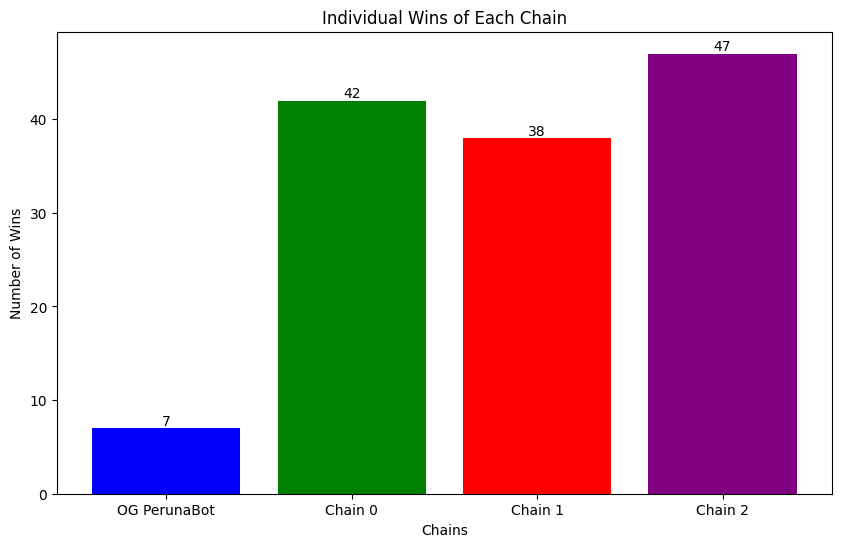

In [40]:
import matplotlib.pyplot as plt

# Data with corrected ties
individual_wins = {
    "OG PerunaBot": 7,
    "Chain 0": 42,
    "Chain 1": 38,
    "Chain 2": 47
}

# Extracting data
chains = list(individual_wins.keys())
wins = list(individual_wins.values())

# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(chains, wins, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Chains')
plt.ylabel('Number of Wins')

# Add text annotations to the plot
for i in range(len(chains)):
    plt.text(i, wins[i], str(wins[i]), ha='center', va='bottom')

plt.title('Individual Wins of Each Chain')
plt.show()

In [ ]:
# Data with corrected ties
individual_wins = {
    "OG PerunaBot": 7,
    "Chain 0": 42,
    "Chain 1": 38,
    "Chain 2": 47
}

print("Win percentage of each chain (out of 72 total comparisons):")
for i in individual_wins:
    win_percentage = ((individual_wins[i] / 72) * 100).__round__(2)
    print(f"{i}: {win_percentage}%")

Win percentage of each chain (out of 72 total comparisons):
OG PerunaBot: 9.72%
Chain 0: 58.33%
Chain 1: 52.78%
Chain 2: 65.28%


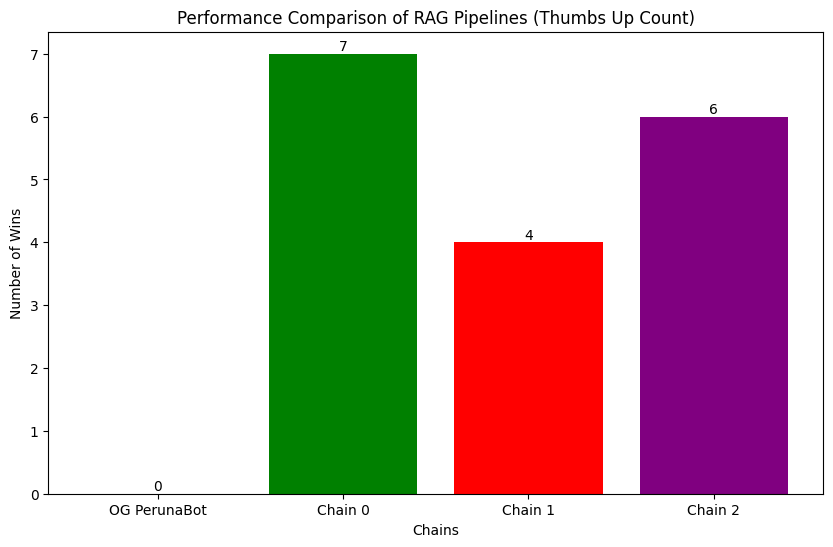

In [42]:
import matplotlib.pyplot as plt

# Data with wins based on thumbs up
overall_wins = {
    "OG PerunaBot": 0,
    "Chain 0": 7,
    "Chain 1": 4,
    "Chain 2": 6
}

# Extracting data
chains = list(overall_wins.keys())
thumbs_up_wins = list(overall_wins.values())

# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(chains, thumbs_up_wins, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Chains')
plt.ylabel('Number of Wins')

# Add text annotations to the plot
for i in range(len(chains)):
    plt.text(i, thumbs_up_wins[i], str(thumbs_up_wins[i]), ha='center', va='bottom')

plt.title('Performance Comparison of RAG Pipelines (Thumbs Up Count)')
plt.show()

**Hypothesis:** 
OG PerunaBot is going to do worse compared to the other chains. Then the order from best to worst will be Chain 2, Chain 1, then Chain 0.

**Results:** OG PerunaBot was in last place, but the order was Chain 2, Chain 0, then Chain 1.

**New Hypothesis:** 
OG PerunaBot did worse because using gpt-3.5-turbo without prompt engineering while the others use gpt-4o with prompt engineering (Chain 0 is basically OG PerunaBot with prompt engineering, using gpt-4o). The biggest difference is in the prompt engineering more than the model. To test this, I will compare all 4 again using gpt-3.5-turbo.

I would also like to compare gpt-4o and gpt-4o-mini for the top 3 chains


In [4]:
from OG_PerunaBot_chain import Original_PerunaBot_eval_chain, Original_PerunaBot_eval_chain_v1, Original_PerunaBot_eval_chain_v2
from chain_0 import base_retriever_eval_chain_0, base_retriever_eval_chain_0_v1, base_retriever_eval_chain_0_v2
from chain_1 import parent_retriever_eval_chain_1, parent_retriever_eval_chain_1_v1, parent_retriever_eval_chain_1_v2
from chain_2 import ensemble_retriever_eval_chain_2, ensemble_retriever_eval_chain_2_v1, ensemble_retriever_eval_chain_2_v2

In [8]:
OG_PerunaBot_chains = {
    "OG PerunaBot (gpt-3.5-turbo)": Original_PerunaBot_eval_chain, # gpt-3.5-turbo
    "Original PerunaBot v1 (gpt-4o)": Original_PerunaBot_eval_chain_v1, # gpt-4o
    "Original PerunaBot v2 (gpt-4o-mini)": Original_PerunaBot_eval_chain_v2, # gpt-4o-mini

}

PerunaBot_0_chains = {
    "PerunaBot 0 v1 (gpt-3.5-turbo)": base_retriever_eval_chain_0_v1, # gpt-3.5-turbo
    "PerunaBot 0 (gpt-4o)": base_retriever_eval_chain_0, # gpt-4o
    "PerunaBot 0 v2 (gpt-4o-mini)": base_retriever_eval_chain_0_v2, # gpt-4o-mini
}

PerunaBot_1_chains = {
    "PerunaBot 1 v1 (gpt-3.5-turbo)": parent_retriever_eval_chain_1_v1, # gpt-3.5-turbo
    "PerunaBot 1 (gpt-4o)": parent_retriever_eval_chain_1, # gpt-4o
    "PerunaBot 1 v2 (gpt-4o-mini)": parent_retriever_eval_chain_1_v2, # gpt-4o-mini
}

PerunaBot_2_chains = {
    "PerunaBot 2 v1 (gpt-3.5-turbo)": ensemble_retriever_eval_chain_2_v1, # gpt-3.5-turbo
    "PerunaBot 2 (gpt-4o)": ensemble_retriever_eval_chain_2, # gpt-4o
    "PerunaBot 2 v2 (gpt-4o-mini)": ensemble_retriever_eval_chain_2_v2 # gpt-4o-mini
}

In [6]:
from langsmith.evaluation import evaluate, LangChainStringEvaluator

# Target task definition

# The name or UUID of the LangSmith dataset to evaluate on.

new_data = "Dataset 8/6/2024"


# List of evaluators to score the outputs of target task
new_evaluators = [
  LangChainStringEvaluator("cot_qa"),
  LangChainStringEvaluator("labeled_criteria", config={"criteria": "coherence"}),
  LangChainStringEvaluator("labeled_criteria", config={"criteria": "helpfulness"})
]

In [51]:
from langsmith.evaluation import evaluate_comparative
from langchain import hub
from langchain_openai import ChatOpenAI
from langsmith.schemas import Run, Example

prompts = {
    "base prompt" : hub.pull("langchain-ai/pairwise-evaluation-2"),
    "rag prompt" : hub.pull("langchain-ai/pairwise-evaluation-rag"),
    "academic advisor prompt" : hub.pull("perunabot-pairwise-evaluation")
}

In [54]:
def evaluate_pairwise_with_prompt(runs: list[Run], example: Example):
    scores = {}
    
    # Create the model to run your evaluator
    model = ChatOpenAI(model="gpt-4o-mini")
    
    runnable = prompts["base prompt"] | model
    response = runnable.invoke({
        "question": example.inputs["Question"],
        "answer_a": runs[0].outputs["output"] if runs[0].outputs is not None else "N/A",
        "answer_b": runs[1].outputs["output"] if runs[1].outputs is not None else "N/A",
    })
    score = response["Preference"]
    if score == 1:
        scores[runs[0].id] = 1
        scores[runs[1].id] = 0
    elif score == 2:
        scores[runs[0].id] = 0
        scores[runs[1].id] = 1
    else:
        scores[runs[0].id] = 0
        scores[runs[1].id] = 0
    return {"key": "ranked_preference", "scores": scores}

def evaluate_pairwise_with_rag_prompt(runs: list[Run], example: Example):

    scores = {}
    
    # Create the model to run your evaluator
    model = ChatOpenAI(model="gpt-4o-mini")
    
    runnable = prompts["rag prompt"] | model
    response = runnable.invoke({
        "question": example.inputs["Question"],
        "answer_a": runs[0].outputs["output"] if runs[0].outputs is not None else "N/A",
        "answer_b": runs[1].outputs["output"] if runs[1].outputs is not None else "N/A",
    })
    score = response["Preference"]
    if score == 1:
        scores[runs[0].id] = 1
        scores[runs[1].id] = 0
    elif score == 2:
        scores[runs[0].id] = 0
        scores[runs[1].id] = 1
    else:
        scores[runs[0].id] = 0
        scores[runs[1].id] = 0
    return {"key": "ranked_preference", "scores": scores}

def evaluate_pairwise_with__advisor_prompt(runs: list[Run], example: Example):
    scores = {}
    
    # Create the model to run your evaluator
    model = ChatOpenAI(model="gpt-4o-mini")
    
    runnable = prompts["academic advisor prompt"] | model
    response = runnable.invoke({
        "question": example.inputs["Question"],
        "answer_a": runs[0].outputs["output"] if runs[0].outputs is not None else "N/A",
        "answer_b": runs[1].outputs["output"] if runs[1].outputs is not None else "N/A",
    })
    score = response["Preference"]
    if score == 1:
        scores[runs[0].id] = 1
        scores[runs[1].id] = 0
    elif score == 2:
        scores[runs[0].id] = 0
        scores[runs[1].id] = 1
    else:
        scores[runs[0].id] = 0
        scores[runs[1].id] = 0
    return {"key": "ranked_preference", "scores": scores}

evaluate_pairwise_functions = {
    "base prompt": evaluate_pairwise_with_prompt,
    "rag prompt": evaluate_pairwise_with_rag_prompt,
    "academic advisor prompt": evaluate_pairwise_with__advisor_prompt
}

In [59]:
# Function to run pairwise evaluations
def run_pairwise_evaluations(experiments, evaluate_pairwise_functions):
    for name in evaluate_pairwise_functions:
        for i in range(len(experiments)):
            for j in range(i + 1, len(experiments)):
                print(f"Evaluating: {experiments[i]} vs {experiments[j]} with prompt: {name}")
                evaluate_comparative(
                    [experiments[i], experiments[j]],
                    evaluators=[evaluate_pairwise_functions[name]],
                    experiment_prefix=f"{experiments[i]} vs {experiments[j]}",
                    randomize_order=True,
                    metadata={"run name": f"{experiments[i]} vs {experiments[j]}", "prompt": name}
                )
                continue

In [ ]:

for name in OG_PerunaBot_chains:
    def predict_chain(inputs: dict):
        chain = OG_PerunaBot_chains[name]
        response = chain.invoke({"question": inputs["Question"]})
        return response["output"]
    
    eval = evaluate(
        predict_chain,
        data=new_data,
        evaluators=new_evaluators,
        experiment_prefix=f"{name}"
    )

View the evaluation results for experiment: 'OG PerunaBot (gpt-3.5-turbo)-81aab9e3' at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/90a80182-3966-43f5-8ab9-b06519a23848/compare?selectedSessions=87d56d66-8f17-4a61-9467-955b33bec539




0it [00:00, ?it/s]

Error running evaluator <DynamicRunEvaluator evaluate> on run f39bb6ba-bf01-4ac7-b916-ea0d85c77148: RateLimitError("Error code: 429 - {'error': {'message': 'Rate limit reached for gpt-4 in organization org-Hkbsf8yAWp77cZYrVZcR2Dim on tokens per min (TPM): Limit 10000, Used 9942, Requested 477. Please try again in 2.514s. Visit https://platform.openai.com/account/rate-limits to learn more.', 'type': 'tokens', 'param': None, 'code': 'rate_limit_exceeded'}}")
Traceback (most recent call last):
  File "c:\Users\yawbt\OneDrive\Documents\GitHub\SURF-Project_Optimizing-PerunaBot\.venv\Lib\site-packages\langsmith\evaluation\_runner.py", line 1258, in _run_evaluators
    evaluator_response = evaluator.evaluate_run(
                         ^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\yawbt\OneDrive\Documents\GitHub\SURF-Project_Optimizing-PerunaBot\.venv\Lib\site-packages\langsmith\evaluation\evaluator.py", line 278, in evaluate_run
    result = self.func(
             ^^^^^^^^^^
  File "c:\Users\y

View the evaluation results for experiment: 'Original PerunaBot v1 (gpt-4o)-dc4c4966' at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/90a80182-3966-43f5-8ab9-b06519a23848/compare?selectedSessions=b0eed89c-c8f2-41db-9a36-945133929aa8




0it [00:00, ?it/s]

Error running evaluator <DynamicRunEvaluator evaluate> on run fa8b342d-6013-42bb-820f-ae4abb57c7fb: RateLimitError("Error code: 429 - {'error': {'message': 'Rate limit reached for gpt-4 in organization org-Hkbsf8yAWp77cZYrVZcR2Dim on tokens per min (TPM): Limit 10000, Used 9744, Requested 520. Please try again in 1.584s. Visit https://platform.openai.com/account/rate-limits to learn more.', 'type': 'tokens', 'param': None, 'code': 'rate_limit_exceeded'}}")
Traceback (most recent call last):
  File "c:\Users\yawbt\OneDrive\Documents\GitHub\SURF-Project_Optimizing-PerunaBot\.venv\Lib\site-packages\langsmith\evaluation\_runner.py", line 1258, in _run_evaluators
    evaluator_response = evaluator.evaluate_run(
                         ^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\yawbt\OneDrive\Documents\GitHub\SURF-Project_Optimizing-PerunaBot\.venv\Lib\site-packages\langsmith\evaluation\evaluator.py", line 278, in evaluate_run
    result = self.func(
             ^^^^^^^^^^
  File "c:\Users\y

View the evaluation results for experiment: 'Original PerunaBot v2 (gpt-4o-mini)-b0bfcf3b' at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/90a80182-3966-43f5-8ab9-b06519a23848/compare?selectedSessions=940b35b5-4208-4166-acce-7db614d152a8




0it [00:00, ?it/s]

Error running evaluator <DynamicRunEvaluator evaluate> on run 679d7c0b-863e-421c-9c82-3b16098c7568: RateLimitError("Error code: 429 - {'error': {'message': 'Rate limit reached for gpt-4 in organization org-Hkbsf8yAWp77cZYrVZcR2Dim on tokens per min (TPM): Limit 10000, Used 9767, Requested 497. Please try again in 1.584s. Visit https://platform.openai.com/account/rate-limits to learn more.', 'type': 'tokens', 'param': None, 'code': 'rate_limit_exceeded'}}")
Traceback (most recent call last):
  File "c:\Users\yawbt\OneDrive\Documents\GitHub\SURF-Project_Optimizing-PerunaBot\.venv\Lib\site-packages\langsmith\evaluation\_runner.py", line 1258, in _run_evaluators
    evaluator_response = evaluator.evaluate_run(
                         ^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\yawbt\OneDrive\Documents\GitHub\SURF-Project_Optimizing-PerunaBot\.venv\Lib\site-packages\langsmith\evaluation\evaluator.py", line 278, in evaluate_run
    result = self.func(
             ^^^^^^^^^^
  File "c:\Users\y

In [60]:
# Define the experiments
OG_PuernaBot_experiments = [
    "OG PerunaBot (gpt-3.5-turbo)-81aab9e3",
    "Original PerunaBot v1 (gpt-4o)-dc4c4966",
    "Original PerunaBot v2 (gpt-4o-mini)-b0bfcf3b"
]

# Run the evaluations
OG_Peruna_Bot_pairwise_results = run_pairwise_evaluations(OG_PuernaBot_experiments, evaluate_pairwise_functions)


Evaluating: OG PerunaBot (gpt-3.5-turbo)-81aab9e3 vs Original PerunaBot v1 (gpt-4o)-dc4c4966 with prompt: base prompt
View the pairwise evaluation results at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/90a80182-3966-43f5-8ab9-b06519a23848/compare?selectedSessions=87d56d66-8f17-4a61-9467-955b33bec539%2Cb0eed89c-c8f2-41db-9a36-945133929aa8&comparativeExperiment=a474415a-f335-45c0-941e-17fbec0c7faf




  0%|          | 0/15 [00:00<?, ?it/s]

Evaluating: OG PerunaBot (gpt-3.5-turbo)-81aab9e3 vs Original PerunaBot v2 (gpt-4o-mini)-b0bfcf3b with prompt: base prompt
View the pairwise evaluation results at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/90a80182-3966-43f5-8ab9-b06519a23848/compare?selectedSessions=87d56d66-8f17-4a61-9467-955b33bec539%2C940b35b5-4208-4166-acce-7db614d152a8&comparativeExperiment=8f16290d-3377-470d-9cbd-9968094837f5




  0%|          | 0/15 [00:00<?, ?it/s]

Evaluating: Original PerunaBot v1 (gpt-4o)-dc4c4966 vs Original PerunaBot v2 (gpt-4o-mini)-b0bfcf3b with prompt: base prompt
View the pairwise evaluation results at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/90a80182-3966-43f5-8ab9-b06519a23848/compare?selectedSessions=b0eed89c-c8f2-41db-9a36-945133929aa8%2C940b35b5-4208-4166-acce-7db614d152a8&comparativeExperiment=3b219fe2-a1f5-47d1-bb94-0204e27eaec0




  0%|          | 0/15 [00:00<?, ?it/s]

Evaluating: OG PerunaBot (gpt-3.5-turbo)-81aab9e3 vs Original PerunaBot v1 (gpt-4o)-dc4c4966 with prompt: rag prompt
View the pairwise evaluation results at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/90a80182-3966-43f5-8ab9-b06519a23848/compare?selectedSessions=87d56d66-8f17-4a61-9467-955b33bec539%2Cb0eed89c-c8f2-41db-9a36-945133929aa8&comparativeExperiment=96e44d2a-3dba-4199-9e75-d5517e6c3b5b




  0%|          | 0/15 [00:00<?, ?it/s]

Evaluating: OG PerunaBot (gpt-3.5-turbo)-81aab9e3 vs Original PerunaBot v2 (gpt-4o-mini)-b0bfcf3b with prompt: rag prompt
View the pairwise evaluation results at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/90a80182-3966-43f5-8ab9-b06519a23848/compare?selectedSessions=87d56d66-8f17-4a61-9467-955b33bec539%2C940b35b5-4208-4166-acce-7db614d152a8&comparativeExperiment=0e4cf554-7501-4bd9-89ed-104c790bb929




  0%|          | 0/15 [00:00<?, ?it/s]

Evaluating: Original PerunaBot v1 (gpt-4o)-dc4c4966 vs Original PerunaBot v2 (gpt-4o-mini)-b0bfcf3b with prompt: rag prompt
View the pairwise evaluation results at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/90a80182-3966-43f5-8ab9-b06519a23848/compare?selectedSessions=b0eed89c-c8f2-41db-9a36-945133929aa8%2C940b35b5-4208-4166-acce-7db614d152a8&comparativeExperiment=fdc566e3-e715-46b2-b550-4604285fb0fb




  0%|          | 0/15 [00:00<?, ?it/s]

Evaluating: OG PerunaBot (gpt-3.5-turbo)-81aab9e3 vs Original PerunaBot v1 (gpt-4o)-dc4c4966 with prompt: academic advisor prompt
View the pairwise evaluation results at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/90a80182-3966-43f5-8ab9-b06519a23848/compare?selectedSessions=87d56d66-8f17-4a61-9467-955b33bec539%2Cb0eed89c-c8f2-41db-9a36-945133929aa8&comparativeExperiment=54eca3e6-aa25-4072-9464-98060b93ec90




  0%|          | 0/15 [00:00<?, ?it/s]

Evaluating: OG PerunaBot (gpt-3.5-turbo)-81aab9e3 vs Original PerunaBot v2 (gpt-4o-mini)-b0bfcf3b with prompt: academic advisor prompt
View the pairwise evaluation results at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/90a80182-3966-43f5-8ab9-b06519a23848/compare?selectedSessions=87d56d66-8f17-4a61-9467-955b33bec539%2C940b35b5-4208-4166-acce-7db614d152a8&comparativeExperiment=376f92b4-d60b-4f8a-a6a8-45ba72d891ec




  0%|          | 0/15 [00:00<?, ?it/s]

Evaluating: Original PerunaBot v1 (gpt-4o)-dc4c4966 vs Original PerunaBot v2 (gpt-4o-mini)-b0bfcf3b with prompt: academic advisor prompt
View the pairwise evaluation results at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/90a80182-3966-43f5-8ab9-b06519a23848/compare?selectedSessions=b0eed89c-c8f2-41db-9a36-945133929aa8%2C940b35b5-4208-4166-acce-7db614d152a8&comparativeExperiment=f40fc5c8-fb28-494e-9ac6-aea05a76efc0




  0%|          | 0/15 [00:00<?, ?it/s]

### Results

![Model Pairwise Evaluation Results](../Data/Evaluation%20Results/pairwise%20evaluation_model%20OG%20PerunaBot.png)

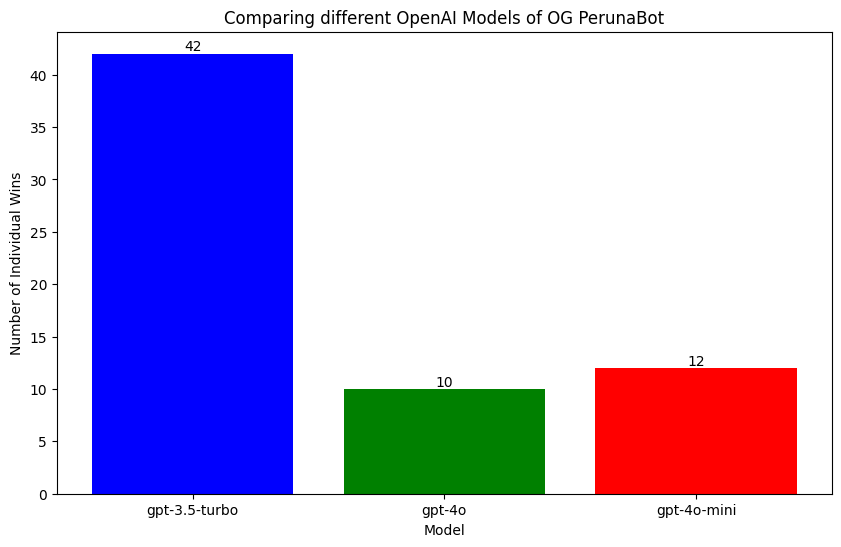

In [77]:
import matplotlib.pyplot as plt

# Data with corrected ties
individual_wins = {
    "gpt-3.5-turbo": 42,
    "gpt-4o": 10,
    "gpt-4o-mini": 12,
}

# Extracting data
chains = list(individual_wins.keys())
wins = list(individual_wins.values())

# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(chains, wins, color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Number of Individual Wins')

# Add text annotations to the plot
for i in range(len(chains)):
    plt.text(i, wins[i], str(wins[i]), ha='center', va='bottom')

plt.title('Comparing different OpenAI Models of OG PerunaBot')
plt.show()

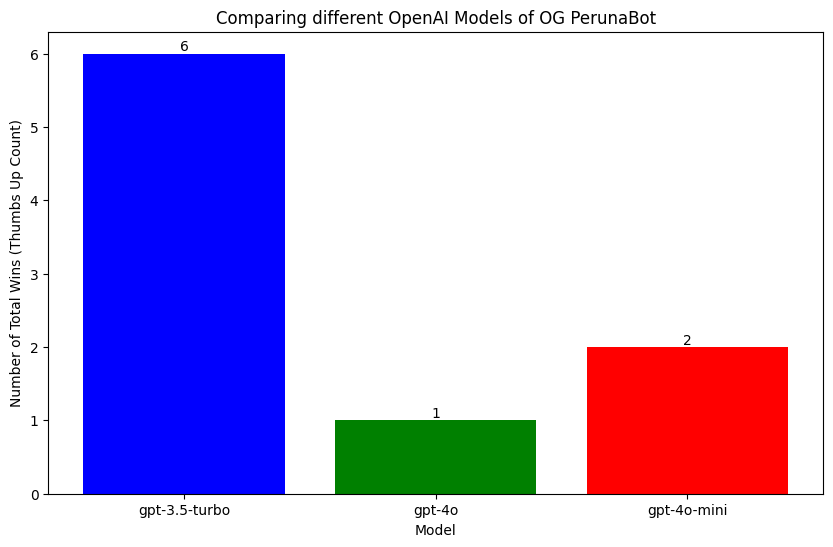

In [80]:
import matplotlib.pyplot as plt

# Data with wins based on thumbs up
overall_wins = {
    "gpt-3.5-turbo": 6,
    "gpt-4o": 1,
    "gpt-4o-mini": 2,
}

# Extracting data
chains = list(overall_wins.keys())
thumbs_up_wins = list(overall_wins.values())

# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(chains, thumbs_up_wins, color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Number of Total Wins (Thumbs Up Count)')

# Add text annotations to the plot
for i in range(len(chains)):
    plt.text(i, thumbs_up_wins[i], str(thumbs_up_wins[i]), ha='center', va='bottom')

plt.title('Comparing different OpenAI Models of OG PerunaBot')
plt.show()

In [61]:
for name in PerunaBot_0_chains:
    def predict_chain(inputs: dict):
        chain = PerunaBot_0_chains[name]
        response = chain.invoke({"question": inputs["Question"]})
        return response["output"]
    
    eval = evaluate(
        predict_chain,
        data=new_data,
        evaluators=new_evaluators,
        experiment_prefix=f"{name}"
    )

View the evaluation results for experiment: 'PerunaBot 0 v1 (gpt-3.5-turbo)-d608a7a9' at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/90a80182-3966-43f5-8ab9-b06519a23848/compare?selectedSessions=76f114e5-4a3f-4b79-973d-84ef862987d7




0it [00:00, ?it/s]

Error running evaluator <DynamicRunEvaluator evaluate> on run eb46e283-fd1f-4d99-a359-7bd5f719ff25: LangSmithError('Failed to POST /feedback in LangSmith API. HTTPError(\'503 Server Error: Service Unavailable for url: https://api.smith.langchain.com/feedback\', \'{"detail":"Internal server error"}\')')
Traceback (most recent call last):
  File "c:\Users\yawbt\OneDrive\Documents\GitHub\SURF-Project_Optimizing-PerunaBot\.venv\Lib\site-packages\langsmith\utils.py", line 129, in raise_for_status_with_text
    response.raise_for_status()
  File "c:\Users\yawbt\OneDrive\Documents\GitHub\SURF-Project_Optimizing-PerunaBot\.venv\Lib\site-packages\requests\models.py", line 1024, in raise_for_status
    raise HTTPError(http_error_msg, response=self)
requests.exceptions.HTTPError: 503 Server Error: Service Unavailable for url: https://api.smith.langchain.com/feedback

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "c:\Users\yawbt\One

View the evaluation results for experiment: 'PerunaBot 0 (gpt-4o)-aa57f368' at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/90a80182-3966-43f5-8ab9-b06519a23848/compare?selectedSessions=5912163a-7251-482c-b7e9-b413a0b60910




0it [00:00, ?it/s]

Error running target function: Error code: 429 - {'error': {'message': 'Rate limit reached for gpt-4o in organization org-Hkbsf8yAWp77cZYrVZcR2Dim on tokens per min (TPM): Limit 30000, Used 29955, Requested 3009. Please try again in 5.928s. Visit https://platform.openai.com/account/rate-limits to learn more.', 'type': 'tokens', 'param': None, 'code': 'rate_limit_exceeded'}}
Error running evaluator <DynamicRunEvaluator evaluate> on run 485cbf99-aca7-4bd9-8945-591375646794: RateLimitError("Error code: 429 - {'error': {'message': 'Rate limit reached for gpt-4 in organization org-Hkbsf8yAWp77cZYrVZcR2Dim on tokens per min (TPM): Limit 10000, Used 9770, Requested 669. Please try again in 2.634s. Visit https://platform.openai.com/account/rate-limits to learn more.', 'type': 'tokens', 'param': None, 'code': 'rate_limit_exceeded'}}")
Traceback (most recent call last):
  File "c:\Users\yawbt\OneDrive\Documents\GitHub\SURF-Project_Optimizing-PerunaBot\.venv\Lib\site-packages\langsmith\evaluation

View the evaluation results for experiment: 'PerunaBot 0 v2 (gpt-4o-mini)-0dc697ef' at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/90a80182-3966-43f5-8ab9-b06519a23848/compare?selectedSessions=3fef4b44-7505-41d8-b0b8-ecc6acfe55c6




0it [00:00, ?it/s]

Error running evaluator <DynamicRunEvaluator evaluate> on run 694b42aa-978f-4dad-ac0c-0660ade68495: LangSmithError('Failed to POST /feedback in LangSmith API. HTTPError(\'503 Server Error: Service Unavailable for url: https://api.smith.langchain.com/feedback\', \'{"detail":"Internal server error"}\')')
Traceback (most recent call last):
  File "c:\Users\yawbt\OneDrive\Documents\GitHub\SURF-Project_Optimizing-PerunaBot\.venv\Lib\site-packages\langsmith\utils.py", line 129, in raise_for_status_with_text
    response.raise_for_status()
  File "c:\Users\yawbt\OneDrive\Documents\GitHub\SURF-Project_Optimizing-PerunaBot\.venv\Lib\site-packages\requests\models.py", line 1024, in raise_for_status
    raise HTTPError(http_error_msg, response=self)
requests.exceptions.HTTPError: 503 Server Error: Service Unavailable for url: https://api.smith.langchain.com/feedback

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "c:\Users\yawbt\One

In [70]:
# Define the experiments
PerunaBot_0_experiments = [
    "PerunaBot 0 v1 (gpt-3.5-turbo)-d608a7a9",
    "PerunaBot 0 (gpt-4o)-aa57f368",
    "PerunaBot 0 v2 (gpt-4o-mini)-0dc697ef"
]

# Run the evaluations
PerunaBot_0_pairwise_results = run_pairwise_evaluations(PerunaBot_0_experiments, evaluate_pairwise_functions)


Evaluating: PerunaBot 0 v1 (gpt-3.5-turbo)-d608a7a9 vs PerunaBot 0 (gpt-4o)-aa57f368 with prompt: base prompt
View the pairwise evaluation results at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/90a80182-3966-43f5-8ab9-b06519a23848/compare?selectedSessions=76f114e5-4a3f-4b79-973d-84ef862987d7%2C5912163a-7251-482c-b7e9-b413a0b60910&comparativeExperiment=84ce9a59-15d6-4e6f-9aee-0b803507a87e




  0%|          | 0/15 [00:00<?, ?it/s]

Evaluating: PerunaBot 0 v1 (gpt-3.5-turbo)-d608a7a9 vs PerunaBot 0 v2 (gpt-4o-mini)-0dc697ef with prompt: base prompt
View the pairwise evaluation results at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/90a80182-3966-43f5-8ab9-b06519a23848/compare?selectedSessions=76f114e5-4a3f-4b79-973d-84ef862987d7%2C3fef4b44-7505-41d8-b0b8-ecc6acfe55c6&comparativeExperiment=12a45220-ce16-46df-966b-1bfb0adf1ead




  0%|          | 0/15 [00:00<?, ?it/s]

Evaluating: PerunaBot 0 (gpt-4o)-aa57f368 vs PerunaBot 0 v2 (gpt-4o-mini)-0dc697ef with prompt: base prompt
View the pairwise evaluation results at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/90a80182-3966-43f5-8ab9-b06519a23848/compare?selectedSessions=5912163a-7251-482c-b7e9-b413a0b60910%2C3fef4b44-7505-41d8-b0b8-ecc6acfe55c6&comparativeExperiment=be4d9109-f988-435b-8965-9d5eaf744dff




  0%|          | 0/15 [00:00<?, ?it/s]

Evaluating: PerunaBot 0 v1 (gpt-3.5-turbo)-d608a7a9 vs PerunaBot 0 (gpt-4o)-aa57f368 with prompt: rag prompt
View the pairwise evaluation results at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/90a80182-3966-43f5-8ab9-b06519a23848/compare?selectedSessions=76f114e5-4a3f-4b79-973d-84ef862987d7%2C5912163a-7251-482c-b7e9-b413a0b60910&comparativeExperiment=9fa288c9-a0a8-4ee5-8f50-d4b2176fc396




  0%|          | 0/15 [00:00<?, ?it/s]

Evaluating: PerunaBot 0 v1 (gpt-3.5-turbo)-d608a7a9 vs PerunaBot 0 v2 (gpt-4o-mini)-0dc697ef with prompt: rag prompt
View the pairwise evaluation results at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/90a80182-3966-43f5-8ab9-b06519a23848/compare?selectedSessions=76f114e5-4a3f-4b79-973d-84ef862987d7%2C3fef4b44-7505-41d8-b0b8-ecc6acfe55c6&comparativeExperiment=61241ed3-1379-4874-84e1-717655f1f358




  0%|          | 0/15 [00:00<?, ?it/s]

Evaluating: PerunaBot 0 (gpt-4o)-aa57f368 vs PerunaBot 0 v2 (gpt-4o-mini)-0dc697ef with prompt: rag prompt
View the pairwise evaluation results at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/90a80182-3966-43f5-8ab9-b06519a23848/compare?selectedSessions=5912163a-7251-482c-b7e9-b413a0b60910%2C3fef4b44-7505-41d8-b0b8-ecc6acfe55c6&comparativeExperiment=f70479d3-e70b-4cbf-bd54-ba1c506f38bd




  0%|          | 0/15 [00:00<?, ?it/s]

Evaluating: PerunaBot 0 v1 (gpt-3.5-turbo)-d608a7a9 vs PerunaBot 0 (gpt-4o)-aa57f368 with prompt: academic advisor prompt
View the pairwise evaluation results at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/90a80182-3966-43f5-8ab9-b06519a23848/compare?selectedSessions=76f114e5-4a3f-4b79-973d-84ef862987d7%2C5912163a-7251-482c-b7e9-b413a0b60910&comparativeExperiment=fa5987bd-1310-4a3b-b776-b984180d9e72




  0%|          | 0/15 [00:00<?, ?it/s]

Evaluating: PerunaBot 0 v1 (gpt-3.5-turbo)-d608a7a9 vs PerunaBot 0 v2 (gpt-4o-mini)-0dc697ef with prompt: academic advisor prompt
View the pairwise evaluation results at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/90a80182-3966-43f5-8ab9-b06519a23848/compare?selectedSessions=76f114e5-4a3f-4b79-973d-84ef862987d7%2C3fef4b44-7505-41d8-b0b8-ecc6acfe55c6&comparativeExperiment=55988da4-5389-43e2-9d4d-7f07b26df39e




  0%|          | 0/15 [00:00<?, ?it/s]

Evaluating: PerunaBot 0 (gpt-4o)-aa57f368 vs PerunaBot 0 v2 (gpt-4o-mini)-0dc697ef with prompt: academic advisor prompt
View the pairwise evaluation results at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/90a80182-3966-43f5-8ab9-b06519a23848/compare?selectedSessions=5912163a-7251-482c-b7e9-b413a0b60910%2C3fef4b44-7505-41d8-b0b8-ecc6acfe55c6&comparativeExperiment=1cf732bf-d947-44ab-9010-94d546ec70bf




  0%|          | 0/15 [00:00<?, ?it/s]

### Results

![Model Pairwise Evaluation Results](../Data/Evaluation%20Results/pairwise%20evaluation_model%20PerunaBot%200.png)

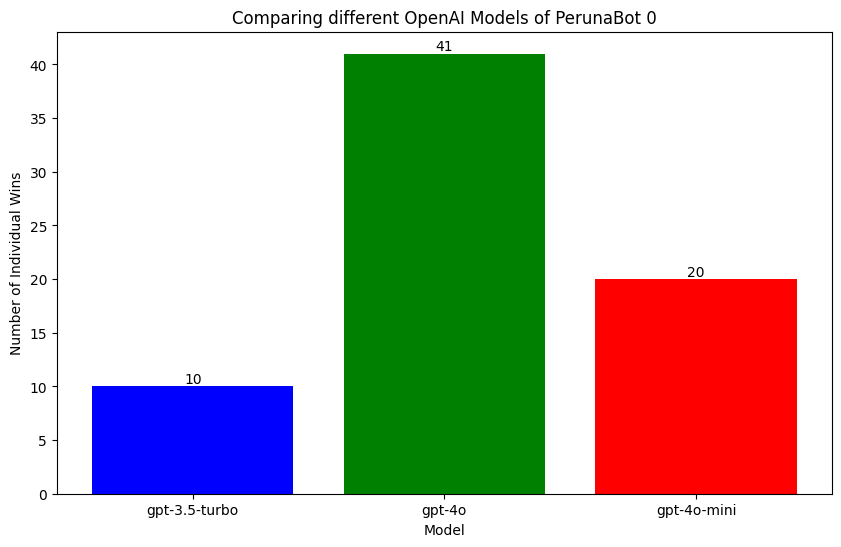

In [81]:
import matplotlib.pyplot as plt

# Data with corrected ties
individual_wins = {
    "gpt-3.5-turbo": 10,
    "gpt-4o": 41,
    "gpt-4o-mini": 20,
}

# Extracting data
chains = list(individual_wins.keys())
wins = list(individual_wins.values())

# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(chains, wins, color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Number of Individual Wins')

# Add text annotations to the plot
for i in range(len(chains)):
    plt.text(i, wins[i], str(wins[i]), ha='center', va='bottom')

plt.title('Comparing different OpenAI Models of PerunaBot 0')
plt.show()



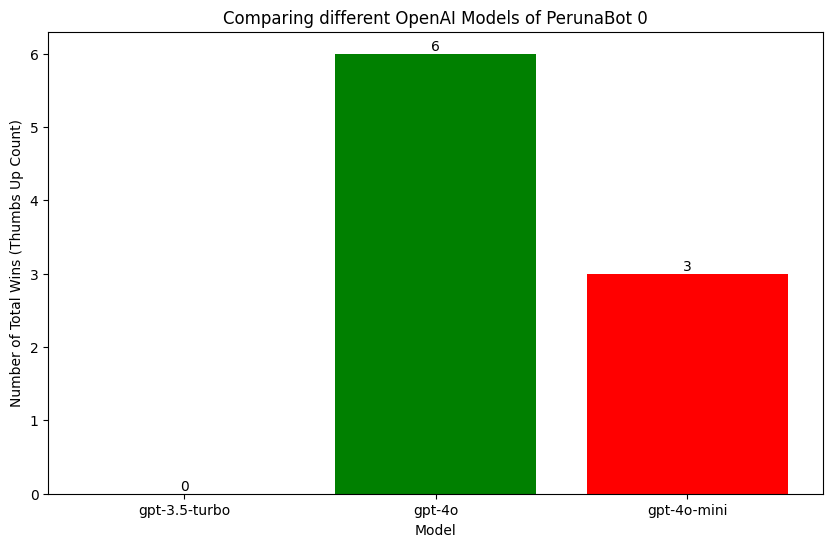

In [83]:
import matplotlib.pyplot as plt

# Data with wins based on thumbs up
overall_wins = {
    "gpt-3.5-turbo": 0,
    "gpt-4o": 6,
    "gpt-4o-mini": 3,
}

# Extracting data
chains = list(overall_wins.keys())
thumbs_up_wins = list(overall_wins.values())

# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(chains, thumbs_up_wins, color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Number of Total Wins (Thumbs Up Count)')

# Add text annotations to the plot
for i in range(len(chains)):
    plt.text(i, thumbs_up_wins[i], str(thumbs_up_wins[i]), ha='center', va='bottom')

plt.title('Comparing different OpenAI Models of PerunaBot 0')
plt.show()

In [62]:
for name in PerunaBot_1_chains:
    def predict_chain(inputs: dict):
        chain = PerunaBot_1_chains[name]
        response = chain.invoke({"question": inputs["Question"]})
        return response["output"]
    
    eval = evaluate(
        predict_chain,
        data=new_data,
        evaluators=new_evaluators,
        experiment_prefix=f"{name}"
    )

View the evaluation results for experiment: 'PerunaBot 1 v1 (gpt-3.5-turbo)-49ffec10' at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/90a80182-3966-43f5-8ab9-b06519a23848/compare?selectedSessions=29fac94c-a3ad-46b8-91c1-374bf0dba2d8




0it [00:00, ?it/s]

Error running evaluator <DynamicRunEvaluator evaluate> on run 5c94ddc5-32df-4b05-b9aa-2f92790c3ed0: RateLimitError("Error code: 429 - {'error': {'message': 'Rate limit reached for gpt-4 in organization org-Hkbsf8yAWp77cZYrVZcR2Dim on tokens per min (TPM): Limit 10000, Used 9614, Requested 456. Please try again in 420ms. Visit https://platform.openai.com/account/rate-limits to learn more.', 'type': 'tokens', 'param': None, 'code': 'rate_limit_exceeded'}}")
Traceback (most recent call last):
  File "c:\Users\yawbt\OneDrive\Documents\GitHub\SURF-Project_Optimizing-PerunaBot\.venv\Lib\site-packages\langsmith\evaluation\_runner.py", line 1258, in _run_evaluators
    evaluator_response = evaluator.evaluate_run(
                         ^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\yawbt\OneDrive\Documents\GitHub\SURF-Project_Optimizing-PerunaBot\.venv\Lib\site-packages\langsmith\evaluation\evaluator.py", line 278, in evaluate_run
    result = self.func(
             ^^^^^^^^^^
  File "c:\Users\ya

View the evaluation results for experiment: 'PerunaBot 1 (gpt-4o)-dcef3d4e' at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/90a80182-3966-43f5-8ab9-b06519a23848/compare?selectedSessions=49ef5af7-8ff4-4205-ab6b-35d52fa8f9f4




0it [00:00, ?it/s]

Error running target function: Error code: 429 - {'error': {'message': 'Rate limit reached for gpt-4o in organization org-Hkbsf8yAWp77cZYrVZcR2Dim on tokens per min (TPM): Limit 30000, Used 27609, Requested 3238. Please try again in 1.694s. Visit https://platform.openai.com/account/rate-limits to learn more.', 'type': 'tokens', 'param': None, 'code': 'rate_limit_exceeded'}}
Error running evaluator <DynamicRunEvaluator evaluate> on run bf2b2e9e-7a46-4180-9068-5cda9dbc1a0d: RateLimitError("Error code: 429 - {'error': {'message': 'Rate limit reached for gpt-4 in organization org-Hkbsf8yAWp77cZYrVZcR2Dim on tokens per min (TPM): Limit 10000, Used 9954, Requested 816. Please try again in 4.62s. Visit https://platform.openai.com/account/rate-limits to learn more.', 'type': 'tokens', 'param': None, 'code': 'rate_limit_exceeded'}}")
Traceback (most recent call last):
  File "c:\Users\yawbt\OneDrive\Documents\GitHub\SURF-Project_Optimizing-PerunaBot\.venv\Lib\site-packages\langsmith\evaluation\

View the evaluation results for experiment: 'PerunaBot 1 v2 (gpt-4o-mini)-ef930257' at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/90a80182-3966-43f5-8ab9-b06519a23848/compare?selectedSessions=8e31113b-4d30-4e7c-98ed-c4d5fd3f6bfa




0it [00:00, ?it/s]

Error running evaluator <DynamicRunEvaluator evaluate> on run a7e5f89c-c7cb-48ef-bbcb-2f0c445884a6: RateLimitError("Error code: 429 - {'error': {'message': 'Rate limit reached for gpt-4 in organization org-Hkbsf8yAWp77cZYrVZcR2Dim on tokens per min (TPM): Limit 10000, Used 9870, Requested 749. Please try again in 3.714s. Visit https://platform.openai.com/account/rate-limits to learn more.', 'type': 'tokens', 'param': None, 'code': 'rate_limit_exceeded'}}")
Traceback (most recent call last):
  File "c:\Users\yawbt\OneDrive\Documents\GitHub\SURF-Project_Optimizing-PerunaBot\.venv\Lib\site-packages\langsmith\evaluation\_runner.py", line 1258, in _run_evaluators
    evaluator_response = evaluator.evaluate_run(
                         ^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\yawbt\OneDrive\Documents\GitHub\SURF-Project_Optimizing-PerunaBot\.venv\Lib\site-packages\langsmith\evaluation\evaluator.py", line 278, in evaluate_run
    result = self.func(
             ^^^^^^^^^^
  File "c:\Users\y

In [71]:
# Define the experiments
PerunaBot_1_experiments = [
    "PerunaBot 1 v1 (gpt-3.5-turbo)-49ffec10",
    "PerunaBot 1 (gpt-4o)-dcef3d4e",
    "PerunaBot 1 v2 (gpt-4o-mini)-ef930257"
]

# Run the evaluations
PerunaBot_1_pairwise_results = run_pairwise_evaluations(PerunaBot_1_experiments, evaluate_pairwise_functions)


Evaluating: PerunaBot 1 v1 (gpt-3.5-turbo)-49ffec10 vs PerunaBot 1 (gpt-4o)-dcef3d4e with prompt: base prompt
View the pairwise evaluation results at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/90a80182-3966-43f5-8ab9-b06519a23848/compare?selectedSessions=29fac94c-a3ad-46b8-91c1-374bf0dba2d8%2C49ef5af7-8ff4-4205-ab6b-35d52fa8f9f4&comparativeExperiment=7d32619a-40ff-4817-90cc-19517eececb9




  0%|          | 0/15 [00:00<?, ?it/s]

Evaluating: PerunaBot 1 v1 (gpt-3.5-turbo)-49ffec10 vs PerunaBot 1 v2 (gpt-4o-mini)-ef930257 with prompt: base prompt
View the pairwise evaluation results at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/90a80182-3966-43f5-8ab9-b06519a23848/compare?selectedSessions=29fac94c-a3ad-46b8-91c1-374bf0dba2d8%2C8e31113b-4d30-4e7c-98ed-c4d5fd3f6bfa&comparativeExperiment=91cecbcf-650a-4313-90a5-6e57105c290c




  0%|          | 0/15 [00:00<?, ?it/s]

Evaluating: PerunaBot 1 (gpt-4o)-dcef3d4e vs PerunaBot 1 v2 (gpt-4o-mini)-ef930257 with prompt: base prompt
View the pairwise evaluation results at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/90a80182-3966-43f5-8ab9-b06519a23848/compare?selectedSessions=49ef5af7-8ff4-4205-ab6b-35d52fa8f9f4%2C8e31113b-4d30-4e7c-98ed-c4d5fd3f6bfa&comparativeExperiment=3f706bbb-fe6d-414a-b461-14b527fb9d36




  0%|          | 0/15 [00:00<?, ?it/s]

Evaluating: PerunaBot 1 v1 (gpt-3.5-turbo)-49ffec10 vs PerunaBot 1 (gpt-4o)-dcef3d4e with prompt: rag prompt
View the pairwise evaluation results at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/90a80182-3966-43f5-8ab9-b06519a23848/compare?selectedSessions=29fac94c-a3ad-46b8-91c1-374bf0dba2d8%2C49ef5af7-8ff4-4205-ab6b-35d52fa8f9f4&comparativeExperiment=8759a31d-3c54-4a90-a8ec-1628e30736e6




  0%|          | 0/15 [00:00<?, ?it/s]

Evaluating: PerunaBot 1 v1 (gpt-3.5-turbo)-49ffec10 vs PerunaBot 1 v2 (gpt-4o-mini)-ef930257 with prompt: rag prompt
View the pairwise evaluation results at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/90a80182-3966-43f5-8ab9-b06519a23848/compare?selectedSessions=29fac94c-a3ad-46b8-91c1-374bf0dba2d8%2C8e31113b-4d30-4e7c-98ed-c4d5fd3f6bfa&comparativeExperiment=08c134f0-5d15-4a35-83cd-6fd6f4f753cf




  0%|          | 0/15 [00:00<?, ?it/s]

Evaluating: PerunaBot 1 (gpt-4o)-dcef3d4e vs PerunaBot 1 v2 (gpt-4o-mini)-ef930257 with prompt: rag prompt
View the pairwise evaluation results at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/90a80182-3966-43f5-8ab9-b06519a23848/compare?selectedSessions=49ef5af7-8ff4-4205-ab6b-35d52fa8f9f4%2C8e31113b-4d30-4e7c-98ed-c4d5fd3f6bfa&comparativeExperiment=3a72f5ff-ca96-4b8e-99a7-1f55d84584ab




  0%|          | 0/15 [00:00<?, ?it/s]

Evaluating: PerunaBot 1 v1 (gpt-3.5-turbo)-49ffec10 vs PerunaBot 1 (gpt-4o)-dcef3d4e with prompt: academic advisor prompt
View the pairwise evaluation results at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/90a80182-3966-43f5-8ab9-b06519a23848/compare?selectedSessions=29fac94c-a3ad-46b8-91c1-374bf0dba2d8%2C49ef5af7-8ff4-4205-ab6b-35d52fa8f9f4&comparativeExperiment=04ce5f9c-8290-4d52-b170-cbe1392005fa




  0%|          | 0/15 [00:00<?, ?it/s]

Evaluating: PerunaBot 1 v1 (gpt-3.5-turbo)-49ffec10 vs PerunaBot 1 v2 (gpt-4o-mini)-ef930257 with prompt: academic advisor prompt
View the pairwise evaluation results at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/90a80182-3966-43f5-8ab9-b06519a23848/compare?selectedSessions=29fac94c-a3ad-46b8-91c1-374bf0dba2d8%2C8e31113b-4d30-4e7c-98ed-c4d5fd3f6bfa&comparativeExperiment=5f5a5a29-98e6-4a1c-9278-7eb9ec617f80




  0%|          | 0/15 [00:00<?, ?it/s]

Evaluating: PerunaBot 1 (gpt-4o)-dcef3d4e vs PerunaBot 1 v2 (gpt-4o-mini)-ef930257 with prompt: academic advisor prompt
View the pairwise evaluation results at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/90a80182-3966-43f5-8ab9-b06519a23848/compare?selectedSessions=49ef5af7-8ff4-4205-ab6b-35d52fa8f9f4%2C8e31113b-4d30-4e7c-98ed-c4d5fd3f6bfa&comparativeExperiment=bef5ef5f-a303-4556-b8ae-6747cc2c8e38




  0%|          | 0/15 [00:00<?, ?it/s]

### Results

![Model Pairwise Evaluation Results](../Data/Evaluation%20Results/pairwise%20evaluation_model%20PerunaBot%201.png)

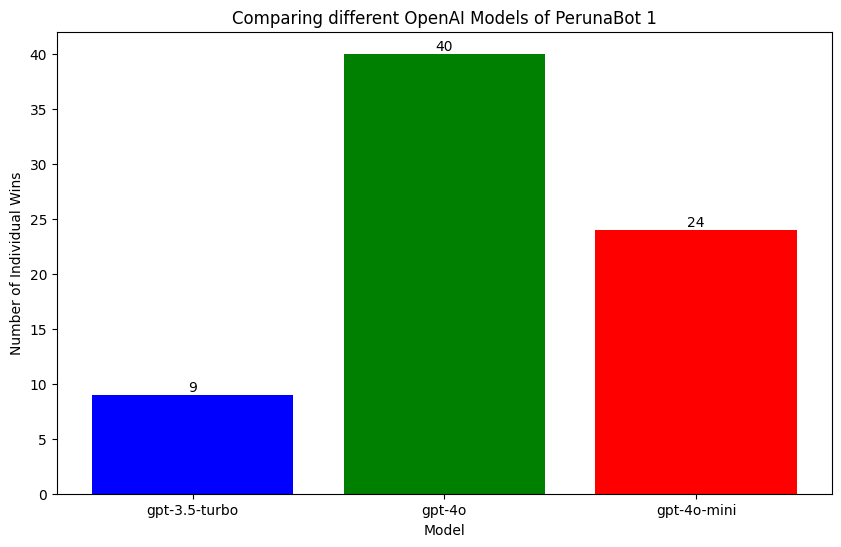

In [84]:
import matplotlib.pyplot as plt

# Data with corrected ties
individual_wins = {
    "gpt-3.5-turbo": 9,
    "gpt-4o": 40,
    "gpt-4o-mini": 24,
}

# Extracting data
chains = list(individual_wins.keys())
wins = list(individual_wins.values())

# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(chains, wins, color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Number of Individual Wins')

# Add text annotations to the plot
for i in range(len(chains)):
    plt.text(i, wins[i], str(wins[i]), ha='center', va='bottom')

plt.title('Comparing different OpenAI Models of PerunaBot 1')
plt.show()



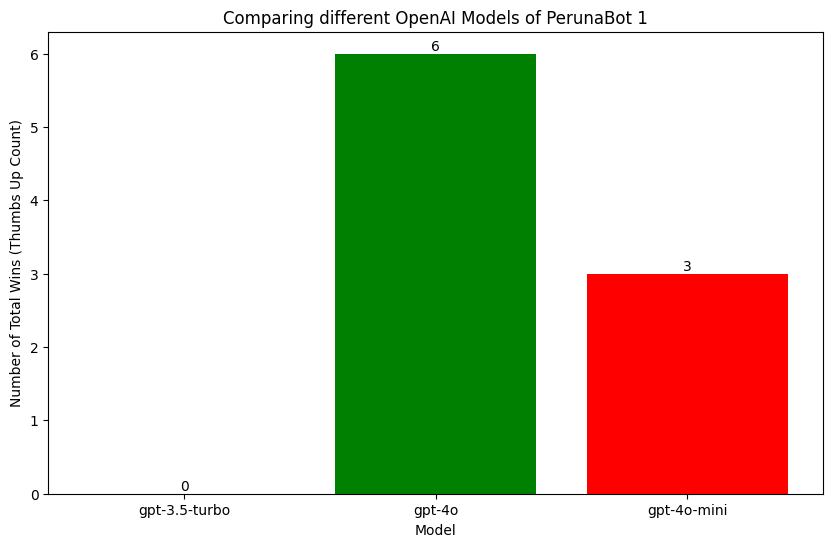

In [85]:

import matplotlib.pyplot as plt

# Data with wins based on thumbs up
overall_wins = {
    "gpt-3.5-turbo": 0,
    "gpt-4o": 6,
    "gpt-4o-mini": 3,
}

# Extracting data
chains = list(overall_wins.keys())
thumbs_up_wins = list(overall_wins.values())

# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(chains, thumbs_up_wins, color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Number of Total Wins (Thumbs Up Count)')

# Add text annotations to the plot
for i in range(len(chains)):
    plt.text(i, thumbs_up_wins[i], str(thumbs_up_wins[i]), ha='center', va='bottom')

plt.title('Comparing different OpenAI Models of PerunaBot 1')
plt.show()

In [63]:
for name in PerunaBot_2_chains:
    def predict_chain(inputs: dict):
        chain = PerunaBot_2_chains[name]
        response = chain.invoke({"question": inputs["Question"]})
        return response["output"]
    
    eval = evaluate(
        predict_chain,
        data=new_data,
        evaluators=new_evaluators,
        experiment_prefix=f"{name}"
    )

View the evaluation results for experiment: 'PerunaBot 2 v1 (gpt-3.5-turbo)-a65a6d5f' at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/90a80182-3966-43f5-8ab9-b06519a23848/compare?selectedSessions=c312def6-4b20-44e6-85de-95ebf88dbe3e




0it [00:00, ?it/s]

Error running evaluator <DynamicRunEvaluator evaluate> on run b817345e-c6d4-4fb6-884d-1d447d8336b3: RateLimitError("Error code: 429 - {'error': {'message': 'Rate limit reached for gpt-4 in organization org-Hkbsf8yAWp77cZYrVZcR2Dim on tokens per min (TPM): Limit 10000, Used 9981, Requested 494. Please try again in 2.85s. Visit https://platform.openai.com/account/rate-limits to learn more.', 'type': 'tokens', 'param': None, 'code': 'rate_limit_exceeded'}}")
Traceback (most recent call last):
  File "c:\Users\yawbt\OneDrive\Documents\GitHub\SURF-Project_Optimizing-PerunaBot\.venv\Lib\site-packages\langsmith\evaluation\_runner.py", line 1258, in _run_evaluators
    evaluator_response = evaluator.evaluate_run(
                         ^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\yawbt\OneDrive\Documents\GitHub\SURF-Project_Optimizing-PerunaBot\.venv\Lib\site-packages\langsmith\evaluation\evaluator.py", line 278, in evaluate_run
    result = self.func(
             ^^^^^^^^^^
  File "c:\Users\ya

View the evaluation results for experiment: 'PerunaBot 2 (gpt-4o)-8055c6d2' at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/90a80182-3966-43f5-8ab9-b06519a23848/compare?selectedSessions=7cbbf56a-dc72-4a84-9320-de6bc6fc1229




0it [00:00, ?it/s]

Error running target function: Error code: 429 - {'error': {'message': 'Rate limit reached for gpt-4o in organization org-Hkbsf8yAWp77cZYrVZcR2Dim on tokens per min (TPM): Limit 30000, Used 29279, Requested 3468. Please try again in 5.494s. Visit https://platform.openai.com/account/rate-limits to learn more.', 'type': 'tokens', 'param': None, 'code': 'rate_limit_exceeded'}}
Error running target function: Error code: 429 - {'error': {'message': 'Rate limit reached for gpt-4o in organization org-Hkbsf8yAWp77cZYrVZcR2Dim on tokens per min (TPM): Limit 30000, Used 26485, Requested 4036. Please try again in 1.042s. Visit https://platform.openai.com/account/rate-limits to learn more.', 'type': 'tokens', 'param': None, 'code': 'rate_limit_exceeded'}}
Error running target function: Error code: 429 - {'error': {'message': 'Rate limit reached for gpt-4o in organization org-Hkbsf8yAWp77cZYrVZcR2Dim on tokens per min (TPM): Limit 30000, Used 29963, Requested 4156. Please try again in 8.238s. Visit

View the evaluation results for experiment: 'PerunaBot 2 v2 (gpt-4o-mini)-86160f66' at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/90a80182-3966-43f5-8ab9-b06519a23848/compare?selectedSessions=cb83589e-4620-43ab-a88f-eb79fcb80ef7




0it [00:00, ?it/s]

Error running evaluator <DynamicRunEvaluator evaluate> on run 243746ac-a7b9-4305-906e-d7c9a6d5c191: RateLimitError("Error code: 429 - {'error': {'message': 'Rate limit reached for gpt-4 in organization org-Hkbsf8yAWp77cZYrVZcR2Dim on tokens per min (TPM): Limit 10000, Used 9791, Requested 605. Please try again in 2.376s. Visit https://platform.openai.com/account/rate-limits to learn more.', 'type': 'tokens', 'param': None, 'code': 'rate_limit_exceeded'}}")
Traceback (most recent call last):
  File "c:\Users\yawbt\OneDrive\Documents\GitHub\SURF-Project_Optimizing-PerunaBot\.venv\Lib\site-packages\langsmith\evaluation\_runner.py", line 1258, in _run_evaluators
    evaluator_response = evaluator.evaluate_run(
                         ^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\yawbt\OneDrive\Documents\GitHub\SURF-Project_Optimizing-PerunaBot\.venv\Lib\site-packages\langsmith\evaluation\evaluator.py", line 278, in evaluate_run
    result = self.func(
             ^^^^^^^^^^
  File "c:\Users\y

In [73]:
# Define the experiments
PerunaBot_2_experiments = [
    "PerunaBot 2 v1 (gpt-3.5-turbo)-a65a6d5f",
    "PerunaBot 2 (gpt-4o)-f9aa86ca",
    "PerunaBot 2 v2 (gpt-4o-mini)-86160f66"
]

# Run the evaluations
PerunaBot_2_pairwise_results = run_pairwise_evaluations(PerunaBot_2_experiments, evaluate_pairwise_functions)


Evaluating: PerunaBot 2 v1 (gpt-3.5-turbo)-a65a6d5f vs PerunaBot 2 (gpt-4o)-f9aa86ca with prompt: base prompt
View the pairwise evaluation results at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/90a80182-3966-43f5-8ab9-b06519a23848/compare?selectedSessions=c312def6-4b20-44e6-85de-95ebf88dbe3e%2C501e9203-57e1-49d2-a5ad-f3fe53831c54&comparativeExperiment=520e13c2-941b-426f-a6c5-f18e94555f8d




  0%|          | 0/15 [00:00<?, ?it/s]

Evaluating: PerunaBot 2 v1 (gpt-3.5-turbo)-a65a6d5f vs PerunaBot 2 v2 (gpt-4o-mini)-86160f66 with prompt: base prompt
View the pairwise evaluation results at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/90a80182-3966-43f5-8ab9-b06519a23848/compare?selectedSessions=c312def6-4b20-44e6-85de-95ebf88dbe3e%2Ccb83589e-4620-43ab-a88f-eb79fcb80ef7&comparativeExperiment=2cff9ec0-56b8-4a69-8a22-56167bd9e63b




  0%|          | 0/15 [00:00<?, ?it/s]

Evaluating: PerunaBot 2 (gpt-4o)-f9aa86ca vs PerunaBot 2 v2 (gpt-4o-mini)-86160f66 with prompt: base prompt
View the pairwise evaluation results at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/90a80182-3966-43f5-8ab9-b06519a23848/compare?selectedSessions=501e9203-57e1-49d2-a5ad-f3fe53831c54%2Ccb83589e-4620-43ab-a88f-eb79fcb80ef7&comparativeExperiment=4e31909f-d741-4a76-92fa-f32297678f8c




  0%|          | 0/15 [00:00<?, ?it/s]

Evaluating: PerunaBot 2 v1 (gpt-3.5-turbo)-a65a6d5f vs PerunaBot 2 (gpt-4o)-f9aa86ca with prompt: rag prompt
View the pairwise evaluation results at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/90a80182-3966-43f5-8ab9-b06519a23848/compare?selectedSessions=c312def6-4b20-44e6-85de-95ebf88dbe3e%2C501e9203-57e1-49d2-a5ad-f3fe53831c54&comparativeExperiment=8098fbc7-97b9-4f0c-8a4f-db38d87bf060




  0%|          | 0/15 [00:00<?, ?it/s]

Evaluating: PerunaBot 2 v1 (gpt-3.5-turbo)-a65a6d5f vs PerunaBot 2 v2 (gpt-4o-mini)-86160f66 with prompt: rag prompt
View the pairwise evaluation results at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/90a80182-3966-43f5-8ab9-b06519a23848/compare?selectedSessions=c312def6-4b20-44e6-85de-95ebf88dbe3e%2Ccb83589e-4620-43ab-a88f-eb79fcb80ef7&comparativeExperiment=48ed42ce-3531-43c0-aa7e-6b4020be31d9




  0%|          | 0/15 [00:00<?, ?it/s]

Evaluating: PerunaBot 2 (gpt-4o)-f9aa86ca vs PerunaBot 2 v2 (gpt-4o-mini)-86160f66 with prompt: rag prompt
View the pairwise evaluation results at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/90a80182-3966-43f5-8ab9-b06519a23848/compare?selectedSessions=501e9203-57e1-49d2-a5ad-f3fe53831c54%2Ccb83589e-4620-43ab-a88f-eb79fcb80ef7&comparativeExperiment=633ab6e5-3144-468a-b5b6-a874179e69c7




  0%|          | 0/15 [00:00<?, ?it/s]

Evaluating: PerunaBot 2 v1 (gpt-3.5-turbo)-a65a6d5f vs PerunaBot 2 (gpt-4o)-f9aa86ca with prompt: academic advisor prompt
View the pairwise evaluation results at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/90a80182-3966-43f5-8ab9-b06519a23848/compare?selectedSessions=c312def6-4b20-44e6-85de-95ebf88dbe3e%2C501e9203-57e1-49d2-a5ad-f3fe53831c54&comparativeExperiment=3788a987-5d9c-4b36-b398-48781591f52f




  0%|          | 0/15 [00:00<?, ?it/s]

Evaluating: PerunaBot 2 v1 (gpt-3.5-turbo)-a65a6d5f vs PerunaBot 2 v2 (gpt-4o-mini)-86160f66 with prompt: academic advisor prompt
View the pairwise evaluation results at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/90a80182-3966-43f5-8ab9-b06519a23848/compare?selectedSessions=c312def6-4b20-44e6-85de-95ebf88dbe3e%2Ccb83589e-4620-43ab-a88f-eb79fcb80ef7&comparativeExperiment=d3263f25-eaba-4b48-bfa1-34d901e53038




  0%|          | 0/15 [00:00<?, ?it/s]

Evaluating: PerunaBot 2 (gpt-4o)-f9aa86ca vs PerunaBot 2 v2 (gpt-4o-mini)-86160f66 with prompt: academic advisor prompt
View the pairwise evaluation results at:
https://smith.langchain.com/o/d6d3de7f-d3b8-5077-9835-ce02339ff6b9/datasets/90a80182-3966-43f5-8ab9-b06519a23848/compare?selectedSessions=501e9203-57e1-49d2-a5ad-f3fe53831c54%2Ccb83589e-4620-43ab-a88f-eb79fcb80ef7&comparativeExperiment=a1881e9c-b64f-4348-85e0-02f40562f2d5




  0%|          | 0/15 [00:00<?, ?it/s]

### Results

![Model Pairwise Evaluation Results](../Data/Evaluation%20Results/pairwise%20evaluation_model%20PerunaBot%202.png)

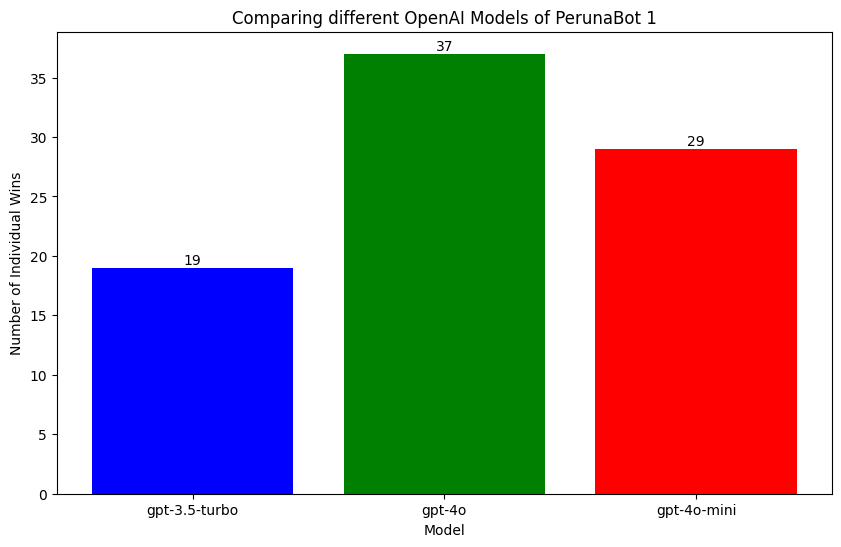

In [86]:
import matplotlib.pyplot as plt

# Data with corrected ties
individual_wins = {
    "gpt-3.5-turbo": 19,
    "gpt-4o": 37,
    "gpt-4o-mini": 29,
}

# Extracting data
chains = list(individual_wins.keys())
wins = list(individual_wins.values())

# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(chains, wins, color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Number of Individual Wins')

# Add text annotations to the plot
for i in range(len(chains)):
    plt.text(i, wins[i], str(wins[i]), ha='center', va='bottom')

plt.title('Comparing different OpenAI Models of PerunaBot 1')
plt.show()



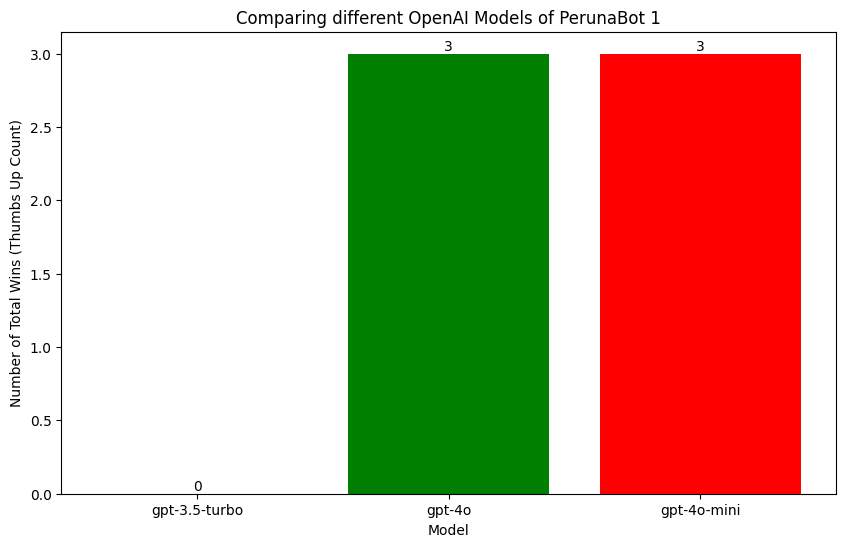

In [87]:

import matplotlib.pyplot as plt

# Data with wins based on thumbs up
overall_wins = {
    "gpt-3.5-turbo": 0,
    "gpt-4o": 3,
    "gpt-4o-mini": 3,
}

# Extracting data
chains = list(overall_wins.keys())
thumbs_up_wins = list(overall_wins.values())

# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(chains, thumbs_up_wins, color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Number of Total Wins (Thumbs Up Count)')

# Add text annotations to the plot
for i in range(len(chains)):
    plt.text(i, thumbs_up_wins[i], str(thumbs_up_wins[i]), ha='center', va='bottom')

plt.title('Comparing different OpenAI Models of PerunaBot 1')
plt.show()